imports

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from IPython.display import Image
#from mpl_toolkits.mplot3d import Axes3D
import string
import plotly.graph_objects as go

In [164]:
file = open('distance_color_type_for_all_stars.txt', 'r')
file_csv = open('distance_color_type_for_all_stars_csv.csv', 'w')

header = [
    'ASASSN_id', 'distance', 'distance_low', 'distance_high', 'g_mag', 'Gaia_name', 'G_mag', 'G_mag_err',
    'abs_mag_G', 'abs_mag_G_low', 'abs_mag_G_high', 'ext_correct_G', 'ext_correct_G_low', 'ext_correct_G_high',
    'BP_RP', 'BP_RP_err', 'BP_RP_0', 'BP_RP_0_err', 'J_mag', 'J_mag_err', 'K_mag', 'K_mag_err',
    'abs_mag_J', 'abs_mag_J_low', 'abs_mag_J_high', 'ext_correct_J', 'ext_correct_J_low', 'ext_correct_J_high',
    'ext_correct_K', 'ext_correct_K_low', 'ext_correct_K_high', 'FinalType', 'ML_classifier_type',
    'visual_classification_type', 'VSX_type', 'VSX_RA', 'VSX_Dec', 'VSX_name'
]

file_csv.write(','.join(header) + '\n')

lines = file.readlines()
for line in lines:
    line_split = line.split()
    
    # Remove the first 'ASASSN' entry
    if line_split[0] == 'ASASSN':
        line_split = line_split[1:]
    
    cleaned_data = []
    for item in line_split:
        if '=' in item:
            continue  # Skip items with '='
        cleaned_data.append(item)
    
    # Combine Gaia_name into a single string
    gaia_start = 5  # Adjusted index where Gaia_name starts after removing 'ASASSN'
    gaia_end = 8    # Adjusted index where Gaia_name ends
    gaia_name = ' '.join(cleaned_data[gaia_start:gaia_end])
    cleaned_data = cleaned_data[:gaia_start] + [gaia_name] + cleaned_data[gaia_end:]
    
    # Combine VSX_name into a single string
    vsx_name_start = 37  # Adjusted index where VSX_name starts
    vsx_name = ' '.join(cleaned_data[vsx_name_start:])
    cleaned_data = cleaned_data[:vsx_name_start] + [vsx_name]

    all_letters = set(string.ascii_letters)
    if any(letter in all_letters for letter in cleaned_data[35]):
        continue
    
    file_csv.write(','.join(cleaned_data) + '\n')

file.close()
file_csv.close()

In [165]:
color_csv = pd.read_csv('distance_color_type_for_all_stars_csv.csv')

In [166]:
exclude_distance_99999 = color_csv[color_csv["distance"] < 99998]
K_mag_clean_1 = exclude_distance_99999[(exclude_distance_99999["K_mag"] != 99.999)]
K_mag_clean_2 = K_mag_clean_1[K_mag_clean_1["K_mag"] > 1]
K_mag_clean_2["J_minus_K"] = K_mag_clean_2["J_mag"] - K_mag_clean_2["K_mag"]
clean_final = K_mag_clean_2[K_mag_clean_2["J_minus_K"] > -1]
clean_final

ASASSN_id  distance  distance_low  distance_high   g_mag  \
0        8590948612      3778          3484           4082  13.245   
1      661428773073      5833          4946           7076  13.951   
2      128850052915      5463          4555           6859  16.166   
3      661427539170     10226          8430          12243  14.876   
4      661428842978      4131          3828           4440  14.566   
...             ...       ...           ...            ...     ...   
25391  472447133837      4426          4108           4813  16.119   
25392  283468348278      4310          3755           4843  14.735   
25393  601296002455      7238          6247           9348  15.362   
25394  644246075250      9021          7142          11992  16.569   
25395   94490254633      5823          5081           6654  15.167   

                          Gaia_name   G_mag  G_mag_err  abs_mag_G  \
0      Gaia DR3 2875539776437822592  12.869      0.012     -0.138   
1      Gaia DR3 2774083440496341504  15.181      0.017      1.279   
2      Gaia DR3 2875434876156537472  15.869      0.017      2.037   
3      Gaia DR3 4689677784096252160  15.459      0.017      0.337   
4      Gaia DR3 2880106185667004928  14.215      0.011      0.796   
...                             ...     ...        ...        ...   
25391  Gaia DR3 2773761352308748032  13.928      0.005      0.698   
25392  Gaia DR3 2422393685595709568  14.706      0.007      1.534   
25393  Gaia DR3 2333314689487138944  14.879      0.009      0.581   
25394  Gaia DR3 6494193484463108608  15.834      0.014      1.029   
25395  Gaia DR3 2880380651257051776  14.982      0.007      0.914   

       abs_mag_G_low  ...  ext_correct_K_low  ext_correct_K_high  FinalType  \
0              0.038  ...              0.015               0.015       RRAB   
1              1.637  ...              0.009               0.009       RRAB   
2              2.432  ...              0.019               0.019       RRAB   
3              0.757  ...              0.009               0.009       RRAB   
4              0.961  ...              0.043               0.043       RRAB   
...              ...  ...                ...                 ...        ...   
25391          0.860  ...              0.000               0.000        RRC   
25392          1.833  ...              0.000               0.000        RRC   
25393          0.901  ...              0.000               0.000        RRC   
25394          1.536  ...              0.004               0.004       RRAB   
25395          1.210  ...              0.031               0.031        RRC   

       ML_classifier_type  visual_classification_type  VSX_type     VSX_RA  \
0                  RRL_ab                         NaN      RRAB    0.01521   
1                  RRL_ab                         NaN      RRAB    0.01669   
2                  RRL_ab                         NaN      RRAB    0.03171   
3                  RRL_ab                         NaN      RRAB    0.06821   
4                  RRL_ab                         NaN      RRAB    0.09900   
...                   ...                         ...       ...        ...   
25391              NonVar                         RRC       RRC  359.93546   
25392               RRL_c                         NaN       RRC  359.93652   
25393                DSCT                         RRC       RRC  359.93862   
25394              NonVar                        RRAB      RRAB  359.94269   
25395               RRL_c                         NaN       RRC  359.94528   

        VSX_Dec                      VSX_name  J_minus_K  
0      35.36286                        GM And      0.336  
1      18.40698          CSS_J000004.0+182425      0.391  
2      34.67397                      SERIV 27      0.233  
3     -72.77875                        BP Tuc      0.380  
4      36.32870                  NSVS 6313844      0.399  
...         ...                           ...        ...  
25391  17.65683           ASAS J235945+17

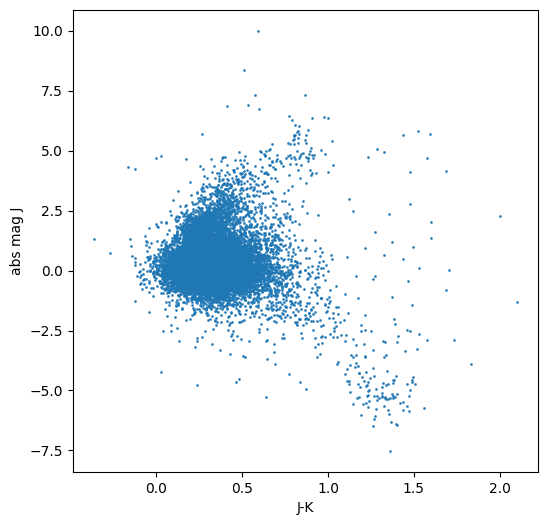

In [167]:
plt.figure(figsize=(6, 6))

plt.scatter(clean_final["J_mag"] - clean_final["K_mag"], clean_final["abs_mag_J"], marker='o', s=1, alpha = 0.85)
plt.xlabel("J-K")
plt.ylabel("abs mag J")
plt.show()

In [168]:
errors = clean_final[((clean_final["distance_high"] - clean_final["distance_low"]) / clean_final["distance"]) < 0.3].copy()
errors

ASASSN_id  distance  distance_low  distance_high   g_mag  \
0        8590948612      3778          3484           4082  13.245   
4      661428842978      4131          3828           4440  14.566   
7      249108450355      2828          2736           2936  13.397   
8      111669995433      2382          2316           2472  13.186   
11      51540332578      2130          2072           2191  14.293   
...             ...       ...           ...            ...     ...   
25388  137440324131      4474          4150           4908  14.784   
25389  661428930020      3221          3032           3469  14.135   
25391  472447133837      4426          4108           4813  16.119   
25392  283468348278      4310          3755           4843  14.735   
25395   94490254633      5823          5081           6654  15.167   

                          Gaia_name   G_mag  G_mag_err  abs_mag_G  \
0      Gaia DR3 2875539776437822592  12.869      0.012     -0.138   
4      Gaia DR3 2880106185667004928  14.215      0.011      0.796   
7      Gaia DR3 2853512332285518592  13.160      0.010      0.806   
8      Gaia DR3 2880528638650410624  13.047      0.007      0.896   
11      Gaia DR3 422761499325397120  13.595      0.009      0.984   
...                             ...     ...        ...        ...   
25388  Gaia DR3 1945536351631291264  14.641      0.008      1.000   
25389  Gaia DR3 1945532056664053376  14.846      0.006      1.928   
25391  Gaia DR3 2773761352308748032  13.928      0.005      0.698   
25392  Gaia DR3 2422393685595709568  14.706      0.007      1.534   
25395  Gaia DR3 2880380651257051776  14.982      0.007      0.914   

       abs_mag_G_low  ...  ext_correct_K_low  ext_correct_K_high  FinalType  \
0              0.038  ...              0.015               0.015       RRAB   
4              0.961  ...              0.043               0.043       RRAB   
7              0.877  ...              0.012               0.012       RRAB   
8              0.957  ...              0.034               0.034        RRC   
11             1.052  ...              0.123               0.124       RRAB   
...              ...  ...                ...                 ...        ...   
25388          1.163  ...              0.050               0.050        RRC   
25389          2.098  ...              0.043               0.059        RRC   
25391          0.860  ...              0.000               0.000        RRC   
25392          1.833  ...              0.000               0.000        RRC   
25395          1.210  ...              0.031               0.031        RRC   

       ML_classifier_type  visual_classification_type  VSX_type     VSX_RA  \
0                  RRL_ab                         NaN      RRAB    0.01521   
4                  RRL_ab                         NaN      RRAB    0.09900   
7                  RRL_ab                         NaN      RRAB    0.14829   
8                   RRL_c                         NaN       RRC    0.18471   
11                 RRL_ab                         NaN      RRAB    0.27937   
...                   ...                         ...       ...        ...   
25388               RRL_c                         NaN       RRC  359.77146   
25389               RRL_c                         NaN       RRC  359.80239   
25391              NonVar                         RRC       RRC  359.93546   
25392               RRL_c                         NaN       RRC  359.93652   
25395               RRL_c                         NaN       RRC  359.94528   

        VSX_Dec                      VSX_name  J_minus_K  
0      35.36286                        GM And      0.336  
4      36.32870                  NSVS 6313844      0.399  
7      26.66375                        GV Peg      0.228  
8      37.84283   ROTSE1 J000044.33 +375034.2      0.216  
11     58.55164                        EW Cas      0.435  
...         ...                           ...        ...  
25388  54.01686                        QY

In [169]:
#plt.figure(figsize=(6, 6))
#sns.scatterplot(x="J_minus_K", y="abs_mag_J", data=errors, hue="ML_classifier_type", alpha=0.5, s=3, palette="inferno_r")
#plt.gca().invert_yaxis()
#plt.title("Color Magnitude Diagram of Star Types Given by Maching Learning Classifier")
#plt.xlabel("J-K Color")
#plt.ylabel("Absolute Magnitude J")
#plt.legend(title="Machine Learning Classifier Type")

# plt.savefig('test_ml_types.eps', format='eps', dpi=1000)

In [170]:
# Main plot
#plt.figure(figsize=(12, 12))
#scatter_plot = sns.scatterplot(
    #x="J_minus_K", 
    #y="abs_mag_J", 
    #data=errors, 
    #hue="ML_classifier_type", 
    #alpha=0.5, 
    #s=3, 
    #palette="inferno_r"
#)
#plt.gca().invert_yaxis()
#plt.title("Color Magnitude Diagram of Star Types Given by Machine Learning Classifier")
#plt.xlabel("J-K Color")
#plt.ylabel("Absolute Magnitude J")
#plt.legend(title="Machine Learning Classifier Type", loc="lower right")
#plt.xlim(-0.1, 1.6)
#plt.ylim(7, -4)

# Adding an inset
#from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Define inset location and size
#ax_inset = inset_axes(plt.gca(), width="30%", height="30%", loc="upper right")
#sns.scatterplot(
    #x="J_minus_K", 
    #y="abs_mag_J", 
    #data=errors, 
    #hue="ML_classifier_type", 
    #alpha=0.5, 
    #s=3, 
    #palette="inferno_r", 
    #legend=False, 
    #ax=ax_inset
#)

# Adjust inset axis limits (zoomed area)
#ax_inset.set_xlim(1, 1.6)  # Adjust as needed
#ax_inset.set_ylim(-3, -7)      # Adjust as needed
#ax_inset.invert_yaxis()
#ax_inset.set_xticks(np.arange(1, 1.6, 0.2))
#ax_inset.set_yticks(np.arange(-3, -7, -1)) 
#ax_inset.set_xlabel("J-K Color")
#ax_inset.set_ylabel("Absolute Magnitude J")

# plt.savefig('inset_ml_types_fig.eps', format='eps', dpi=1000)

In [171]:
#plt.figure(figsize=(6, 6))
#sns.scatterplot(x="J_minus_K", y="abs_mag_J", data=eclipsing, hue="ML_classifier_type", alpha=0.6, s=3, palette=["black", "lightgreen", "orange"])
#plt.gca().invert_yaxis()
#plt.show()

In [172]:
#plt.figure(figsize=(6, 6))
#sns.scatterplot(x="J_minus_K", y="abs_mag_J", data=rr_lyrae, hue="ML_classifier_type", hue_order=["RRL_d", "RRL_c", "RRL_ab"], alpha=0.7, palette=["black", "lightgreen", "orange"], s=3)
#plt.gca().invert_yaxis()

#plt.title("Color Magnitude Diagram of RRL Stars Given by Maching Learning Classifier")
#plt.xlabel("J-K Color")
#plt.ylabel("Absolute Magnitude J")
#plt.legend(title="Machine Learning Classifier Type")

# plt.savefig('rrl.eps', format='eps', dpi=1000)

In [173]:
clean_final["FinalType"].unique()

array(['RRAB', 'RRC', 'RR(B)', 'CONSTANT', 'NEED', 'EB', 'EW', 'BY', 'EA',
       'SRA', 'CONST', 'SXPHE', 'RS', 'L', 'SRB', 'GDOR:', 'DSCT', 'BY:',
       'INS', 'GDOR', 'CEP:', 'SR', 'SRD', 'NO', 'DCEP', 'CWA:',
       'LPV_MIRA_AGB_C', 'BY+UV', 'CEP', 'BLENDED', 'RC', 'CONSTANTA',
       'BCEP:', 'TRU', 'L:', 'COSNTANT', 'RS:', 'CEPH', 'YSO'],
      dtype=object)

In [174]:
clean_final.groupby("FinalType").agg("count").reset_index()

FinalType  ASASSN_id  distance  distance_low  distance_high  g_mag  \
0            BCEP:          1         1             1              1      1   
1          BLENDED          1         1             1              1      1   
2               BY         27        27            27             27     27   
3            BY+UV          4         4             4              4      4   
4              BY:          3         3             3              3      3   
5              CEP         15        15            15             15     15   
6             CEP:          1         1             1              1      1   
7             CEPH         14        14            14             14     14   
8            CONST          5         5             5              5      5   
9         CONSTANT        275       275           275            275    275   
10       CONSTANTA          1         1             1              1      1   
11        COSNTANT          1         1             1              1      1   
12            CWA:          1         1             1              1      1   
13            DCEP          2         2             2              2      2   
14            DSCT        102       102           102            102    102   
15              EA         89        89            89             89     89   
16              EB         85        85            85             85     85   
17              EW        789       789           789            789    789   
18            GDOR          9         9             9              9      9   
19           GDOR:          2         2             2              2      2   
20             INS          1         1             1              1      1   
21               L         32        32            32             32     32   
22              L:          1         1             1              1      1   
23  LPV_MIRA_AGB_C          1         1             1              1      1   
24            NEED        292       292           292            292    292   
25              NO         91        91            91             91     91   
26              RC          1         1             1              1      1   
27           RR(B)        283       283           283            283    283   
28            RRAB      14572     14572         14572          14572  14572   
29             RRC       6000      6000          6000           6000   6000   
30              RS         17        17            17             17     17   
31             RS:          1         1             1              1      1   
32              SR         68        68            68             68     68   
33             SRA          5         5             5              5      5   
34             SRB          1         1             1              1      1   
35             SRD          1         1             1              1      1   
36           SXPHE          3         3             3              3      3   
37             TRU          1         1             1              1      1   
38             YSO          1         1             1              1      1   

    Gaia_name  G_mag  G_mag_err  abs_mag_G  ...  ext_correct_K  \
0           1      1          1          1  ...              1   
1           1      1          1          1  ...              1   
2          27     27         27         27  ...             27   
3           4      4          4          4  ...              4   
4           3      3          3          3  ...              3   
5          15     15         15         15  ...             15   
6           1      1          1          1  ...              1   
7          14     14         14         14  ...             14   
8           5      5          5          5  ...              5   
9         275    275        275        275  ...            275   
10          1      1          1          1  ...              1   
11          1      1          1          1  ...         

In [175]:
errors.groupby("FinalType").agg("count").reset_index()

FinalType  ASASSN_id  distance  distance_low  distance_high  g_mag  \
0            BCEP:          1         1             1              1      1   
1          BLENDED          1         1             1              1      1   
2               BY         26        26            26             26     26   
3            BY+UV          4         4             4              4      4   
4              BY:          2         2             2              2      2   
5              CEP          4         4             4              4      4   
6             CEPH         12        12            12             12     12   
7            CONST          4         4             4              4      4   
8         CONSTANT        192       192           192            192    192   
9        CONSTANTA          1         1             1              1      1   
10            CWA:          1         1             1              1      1   
11            DCEP          2         2             2              2      2   
12            DSCT         83        83            83             83     83   
13              EA         84        84            84             84     84   
14              EB         80        80            80             80     80   
15              EW        721       721           721            721    721   
16            GDOR          8         8             8              8      8   
17           GDOR:          2         2             2              2      2   
18             INS          1         1             1              1      1   
19               L         27        27            27             27     27   
20              L:          1         1             1              1      1   
21  LPV_MIRA_AGB_C          1         1             1              1      1   
22            NEED         94        94            94             94     94   
23              NO         26        26            26             26     26   
24              RC          1         1             1              1      1   
25           RR(B)        145       145           145            145    145   
26            RRAB       6541      6541          6541           6541   6541   
27             RRC       3786      3786          3786           3786   3786   
28              RS         16        16            16             16     16   
29              SR         49        49            49             49     49   
30             SRA          3         3             3              3      3   
31             SRB          1         1             1              1      1   
32             SRD          1         1             1              1      1   
33           SXPHE          2         2             2              2      2   
34             TRU          1         1             1              1      1   
35             YSO          1         1             1              1      1   

    Gaia_name  G_mag  G_mag_err  abs_mag_G  ...  ext_correct_K  \
0           1      1          1          1  ...              1   
1           1      1          1          1  ...              1   
2          26     26         26         26  ...             26   
3           4      4          4          4  ...              4   
4           2      2          2          2  ...              2   
5           4      4          4          4  ...              4   
6          12     12         12         12  ...             12   
7           4      4          4          4  ...              4   
8         192    192        192        192  ...            192   
9           1      1          1          1  ...              1   
10          1      1          1          1  ...              1   
11          2      2          2          2  ...              2   
12         83     83         83         83  ...             83   
13         84     84         84         84  ...             84   
14         80     80         80         80  ...             80   
15        721    721        7

In [176]:
rr_lyrae_final = errors[(errors["FinalType"] == "RRAB") | (errors["FinalType"] == "RRC") | (errors["FinalType"] == "RR(B)")]
rr_lyrae_final

ASASSN_id  distance  distance_low  distance_high   g_mag  \
0        8590948612      3778          3484           4082  13.245   
4      661428842978      4131          3828           4440  14.566   
7      249108450355      2828          2736           2936  13.397   
8      111669995433      2382          2316           2472  13.186   
11      51540332578      2130          2072           2191  14.293   
...             ...       ...           ...            ...     ...   
25388  137440324131      4474          4150           4908  14.784   
25389  661428930020      3221          3032           3469  14.135   
25391  472447133837      4426          4108           4813  16.119   
25392  283468348278      4310          3755           4843  14.735   
25395   94490254633      5823          5081           6654  15.167   

                          Gaia_name   G_mag  G_mag_err  abs_mag_G  \
0      Gaia DR3 2875539776437822592  12.869      0.012     -0.138   
4      Gaia DR3 2880106185667004928  14.215      0.011      0.796   
7      Gaia DR3 2853512332285518592  13.160      0.010      0.806   
8      Gaia DR3 2880528638650410624  13.047      0.007      0.896   
11      Gaia DR3 422761499325397120  13.595      0.009      0.984   
...                             ...     ...        ...        ...   
25388  Gaia DR3 1945536351631291264  14.641      0.008      1.000   
25389  Gaia DR3 1945532056664053376  14.846      0.006      1.928   
25391  Gaia DR3 2773761352308748032  13.928      0.005      0.698   
25392  Gaia DR3 2422393685595709568  14.706      0.007      1.534   
25395  Gaia DR3 2880380651257051776  14.982      0.007      0.914   

       abs_mag_G_low  ...  ext_correct_K_low  ext_correct_K_high  FinalType  \
0              0.038  ...              0.015               0.015       RRAB   
4              0.961  ...              0.043               0.043       RRAB   
7              0.877  ...              0.012               0.012       RRAB   
8              0.957  ...              0.034               0.034        RRC   
11             1.052  ...              0.123               0.124       RRAB   
...              ...  ...                ...                 ...        ...   
25388          1.163  ...              0.050               0.050        RRC   
25389          2.098  ...              0.043               0.059        RRC   
25391          0.860  ...              0.000               0.000        RRC   
25392          1.833  ...              0.000               0.000        RRC   
25395          1.210  ...              0.031               0.031        RRC   

       ML_classifier_type  visual_classification_type  VSX_type     VSX_RA  \
0                  RRL_ab                         NaN      RRAB    0.01521   
4                  RRL_ab                         NaN      RRAB    0.09900   
7                  RRL_ab                         NaN      RRAB    0.14829   
8                   RRL_c                         NaN       RRC    0.18471   
11                 RRL_ab                         NaN      RRAB    0.27937   
...                   ...                         ...       ...        ...   
25388               RRL_c                         NaN       RRC  359.77146   
25389               RRL_c                         NaN       RRC  359.80239   
25391              NonVar                         RRC       RRC  359.93546   
25392               RRL_c                         NaN       RRC  359.93652   
25395               RRL_c                         NaN       RRC  359.94528   

        VSX_Dec                      VSX_name  J_minus_K  
0      35.36286                        GM And      0.336  
4      36.32870                  NSVS 6313844      0.399  
7      26.66375                        GV Peg      0.228  
8      37.84283   ROTSE1 J000044.33 +375034.2      0.216  
11     58.55164                        EW Cas      0.435  
...         ...                           ...        ...  
25388  54.01686                        QY

In [177]:
final_data = errors[(errors["FinalType"] == "RRAB") | (errors["FinalType"] == "RRC") | (errors["FinalType"] == "RR(B)") |  (errors["FinalType"] == "EW") | (errors["FinalType"] == "DSCT") | (errors["FinalType"] == "EW") | (errors["FinalType"] == "EA") | (errors["FinalType"] == "EB")] 

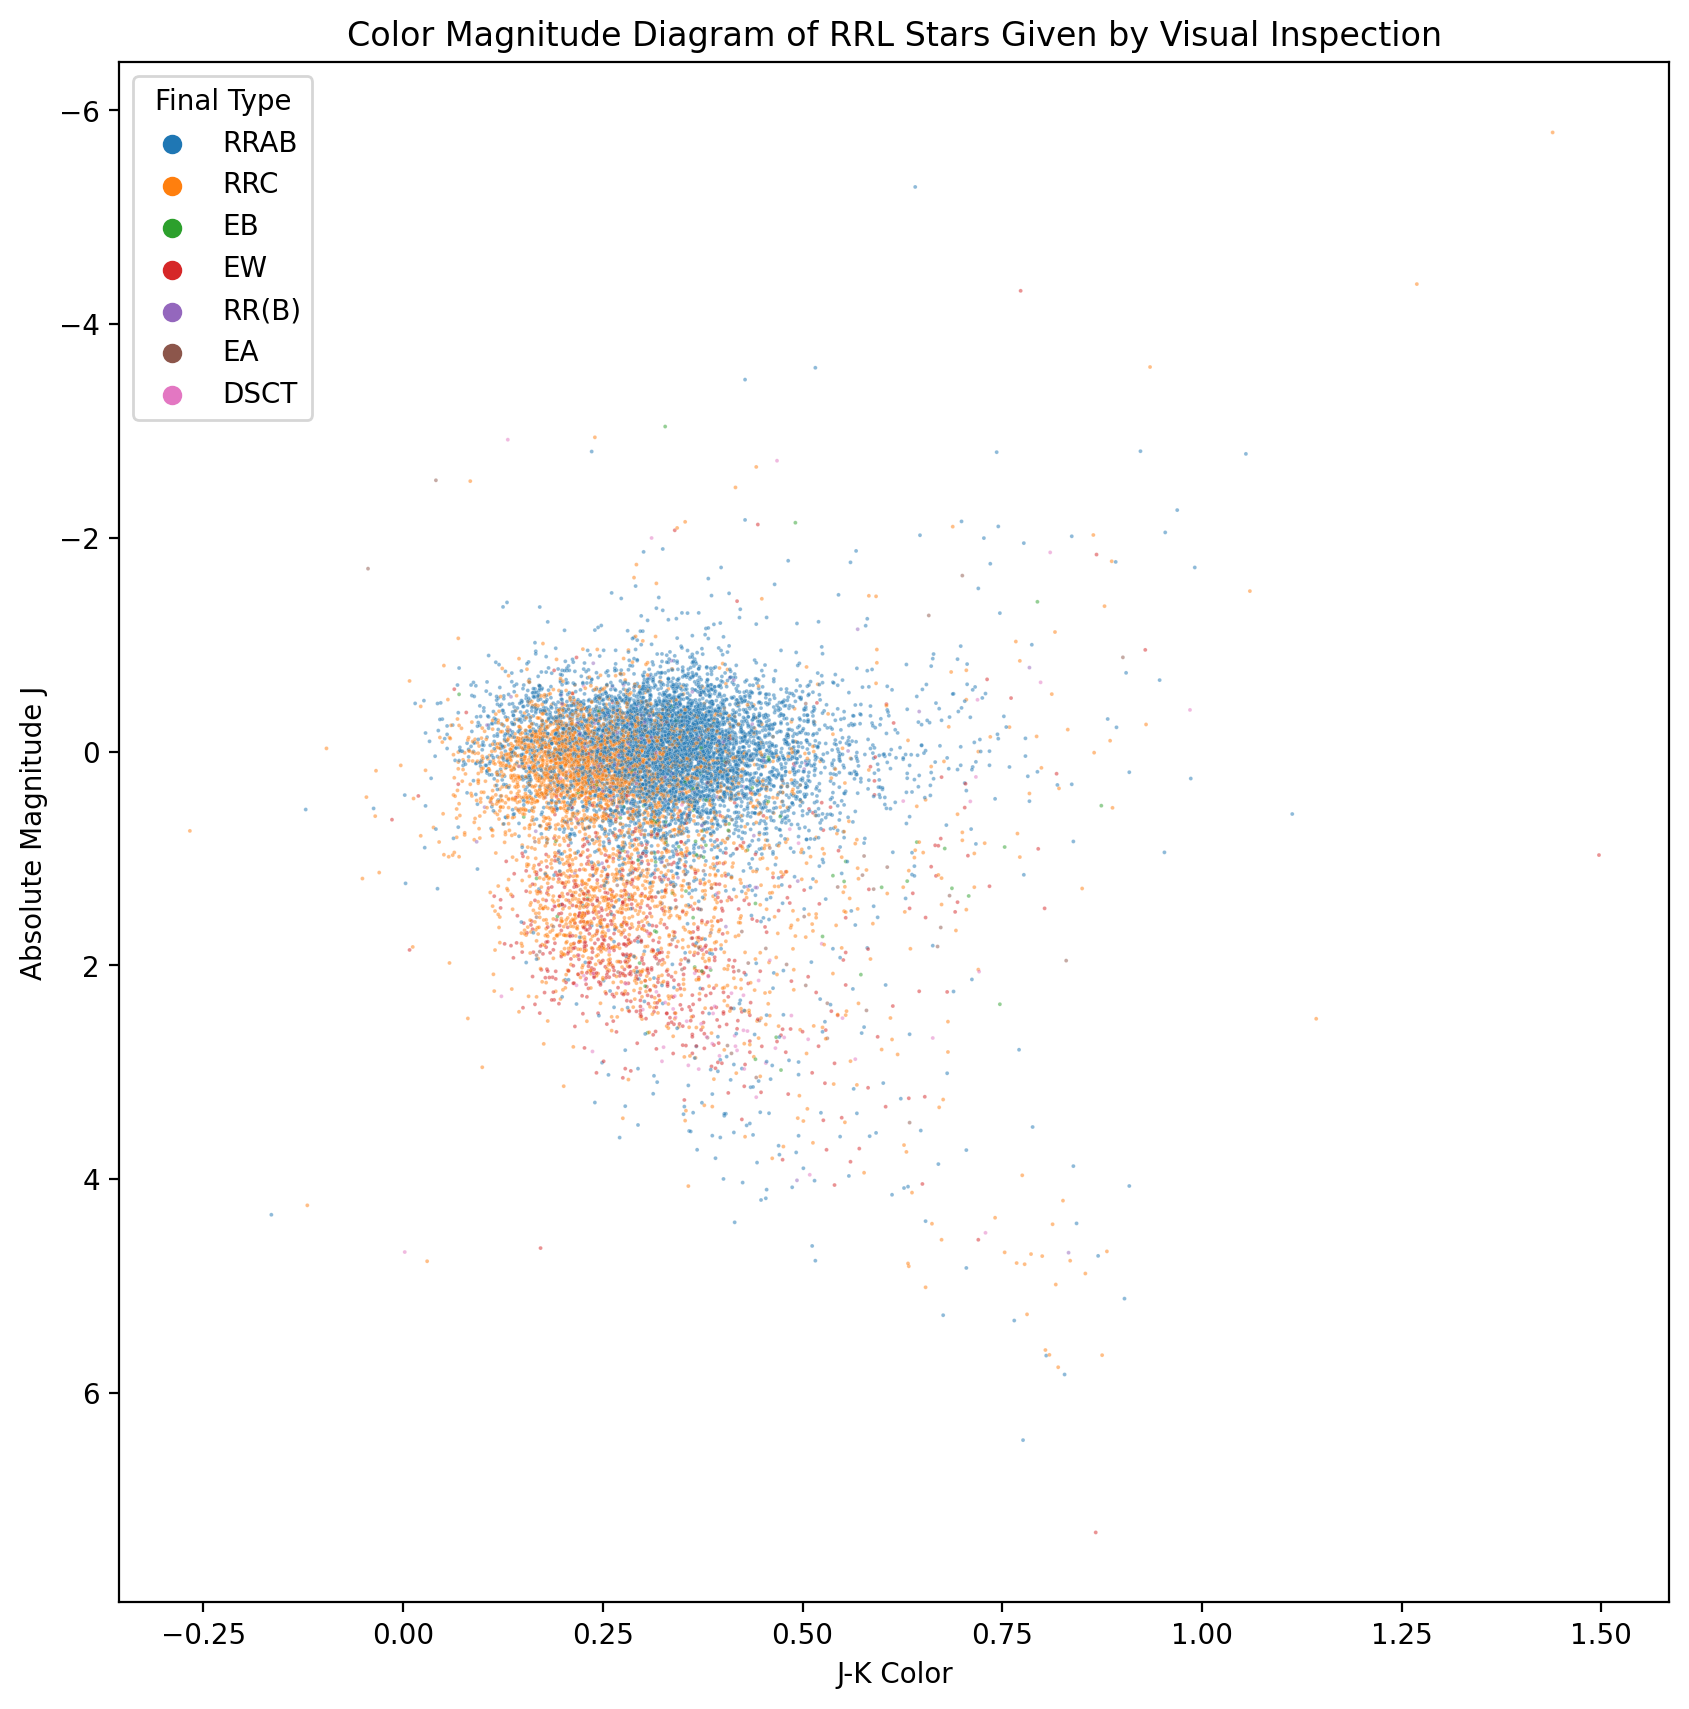

In [178]:
plt.figure(figsize=(10, 10), dpi = 200)
sns.scatterplot(x="J_minus_K", y="abs_mag_J", data=final_data, hue="FinalType", alpha=0.5, s=2)
plt.gca().invert_yaxis()

plt.title("Color Magnitude Diagram of RRL Stars Given by Visual Inspection")
plt.xlabel("J-K Color")
plt.ylabel("Absolute Magnitude J")
plt.legend(title="Final Type")

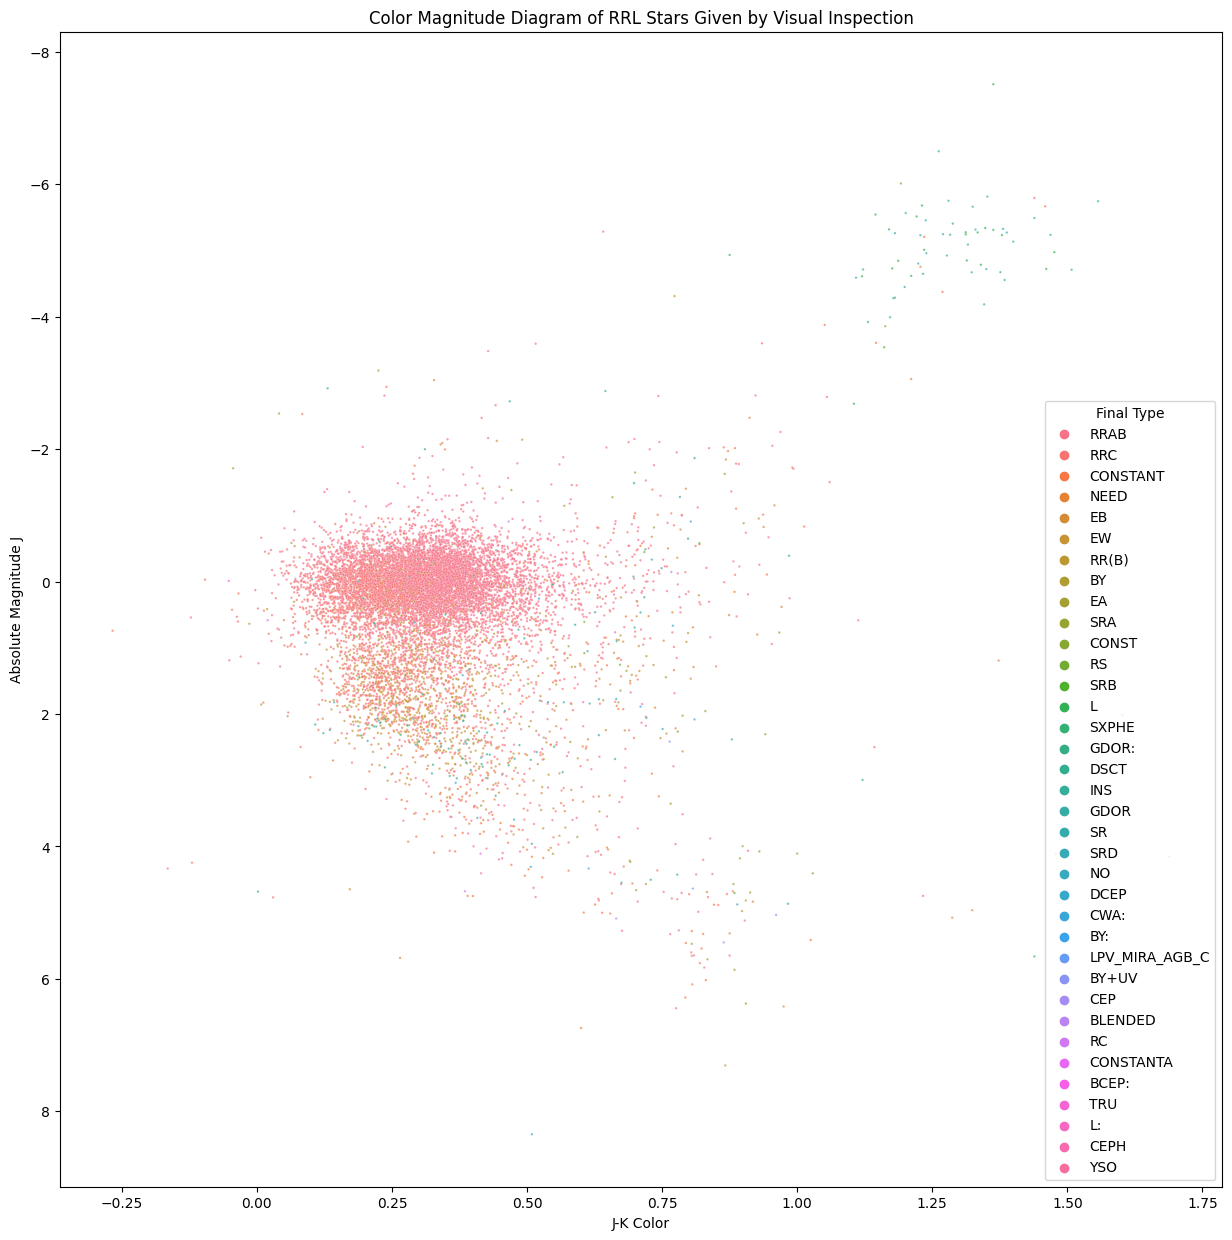

In [179]:
plt.figure(figsize=(15, 15))
sns.scatterplot(x="J_minus_K", y="abs_mag_J", data=errors, hue="FinalType", alpha=0.7, s=3)
plt.gca().invert_yaxis()

plt.title("Color Magnitude Diagram of RRL Stars Given by Visual Inspection")
plt.xlabel("J-K Color")
plt.ylabel("Absolute Magnitude J")
plt.legend(title="Final Type")

In [180]:
# Error calculations
errors['J-K'] = errors['J_mag'] - errors['K_mag']
errors['J-K_err'] = np.sqrt(errors['J_mag_err']**2 + errors['K_mag_err']**2)

# Distance uncertainty calculation
errors['sigma_distance'] = (errors['distance_high'] - errors['distance_low']) / 2
errors['sigma_dist_term'] = (5/np.log(10)) * (errors['sigma_distance']/errors['distance'])

# Calculate E(B-V) using extinction corrections
R_J = 0.91  # From Yuan et al. 2013
R_K = 0.39

# Derive E(B-V) from extinction corrections
errors['E(B-V)'] = errors['ext_correct_J'] / R_J  # A_J = R_J * E(B-V) => E(B-V) = A_J/R_J

# Now calculate A_J and E(J-K) safely
errors['A_J'] = R_J * errors['E(B-V)']
errors['E(J-K)'] = (R_J - R_K) * errors['E(B-V)']

# Absolute magnitude calculation with error propagation
errors['abs_mag_J'] = (errors['J_mag'] 
                      - 5 * np.log10(errors['distance']) 
                      + 5 
                      - errors['A_J'])
errors['abs_mag_J_err'] = np.sqrt(
    errors['J_mag_err']**2 + 
    errors['sigma_dist_term']**2 + 
    (R_J * 0.1 * errors['E(B-V)'])**2  # Assuming 10% error in E(B-V)
)

# Quality cuts
filtered = errors[
    (errors['J-K_err'] < 0.05) &
    (errors['abs_mag_J_err'] < 0.15) &
    (errors['E(J-K)'] < 0.1) &
    (errors['A_J'] < 1.5)
]

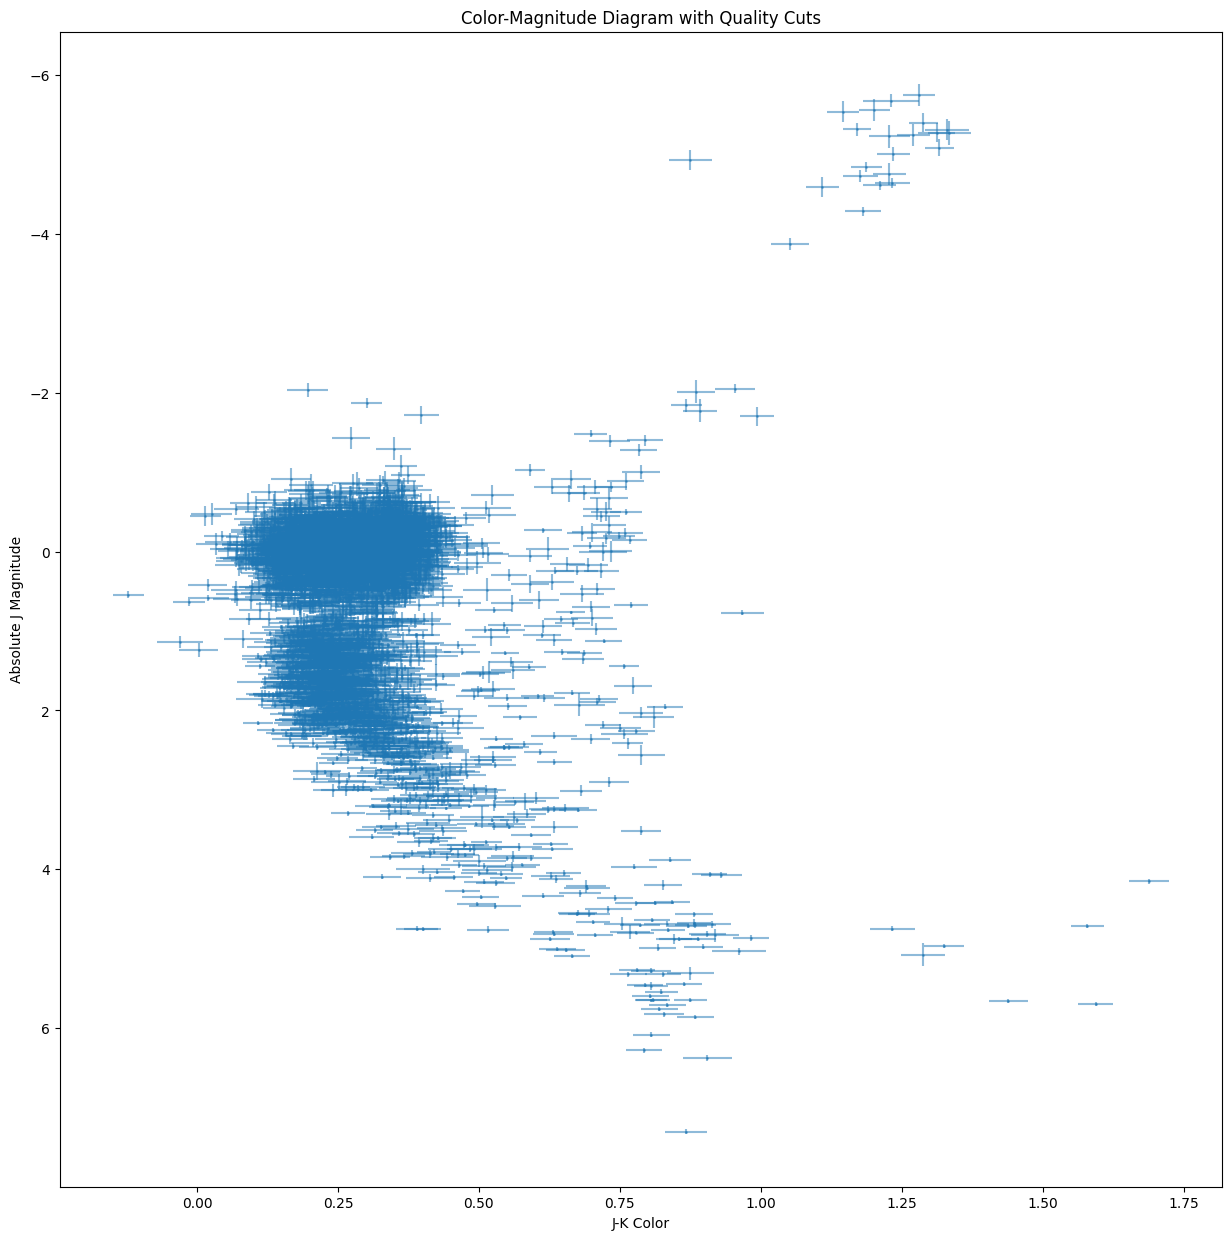

In [181]:
# Plotting
plt.figure(figsize=(15, 15), dpi=100)
plt.errorbar(x = filtered['J-K'], y = filtered['abs_mag_J'], xerr=filtered['J-K_err'], yerr=filtered['abs_mag_J_err'], fmt='.', markersize=2, alpha=0.5)
plt.gca().invert_yaxis()
plt.xlabel('J-K Color')
plt.ylabel('Absolute J Magnitude')
plt.title('Color-Magnitude Diagram with Quality Cuts')
plt.show()

In [182]:
# Remove unwanted FinalTypes
filtered["FinalType"] = filtered["FinalType"].replace("CONST", "CONSTANT")
filtered["FinalType"] = filtered["FinalType"].replace("RC", "RRC")
unwanted_types = ["CWA:", "NEED", "NO", "BY:", "GDOR:", "SRA", "CONSTANT", "GDOR", "DCEP", "CEP", "CEPH", "SR", "SRD", "RS", "L", "BY", "SXPHE", "LPV_MIRA_AGB_C", "CONSTANTA", "TRU", "L:", "BY+UV"]
filtered = filtered[~filtered["FinalType"].isin(unwanted_types)]

/var/folders/kv/b7ycyzg17v3f_grsjzhtpwt80000gn/T/ipykernel_3875/3889908911.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/kv/b7ycyzg17v3f_grsjzhtpwt80000gn/T/ipykernel_3875/3889908911.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [183]:
filtered['FinalType'].unique()

array(['RRAB', 'RRC', 'EW', 'EB', 'EA', 'RR(B)', 'DSCT'], dtype=object)

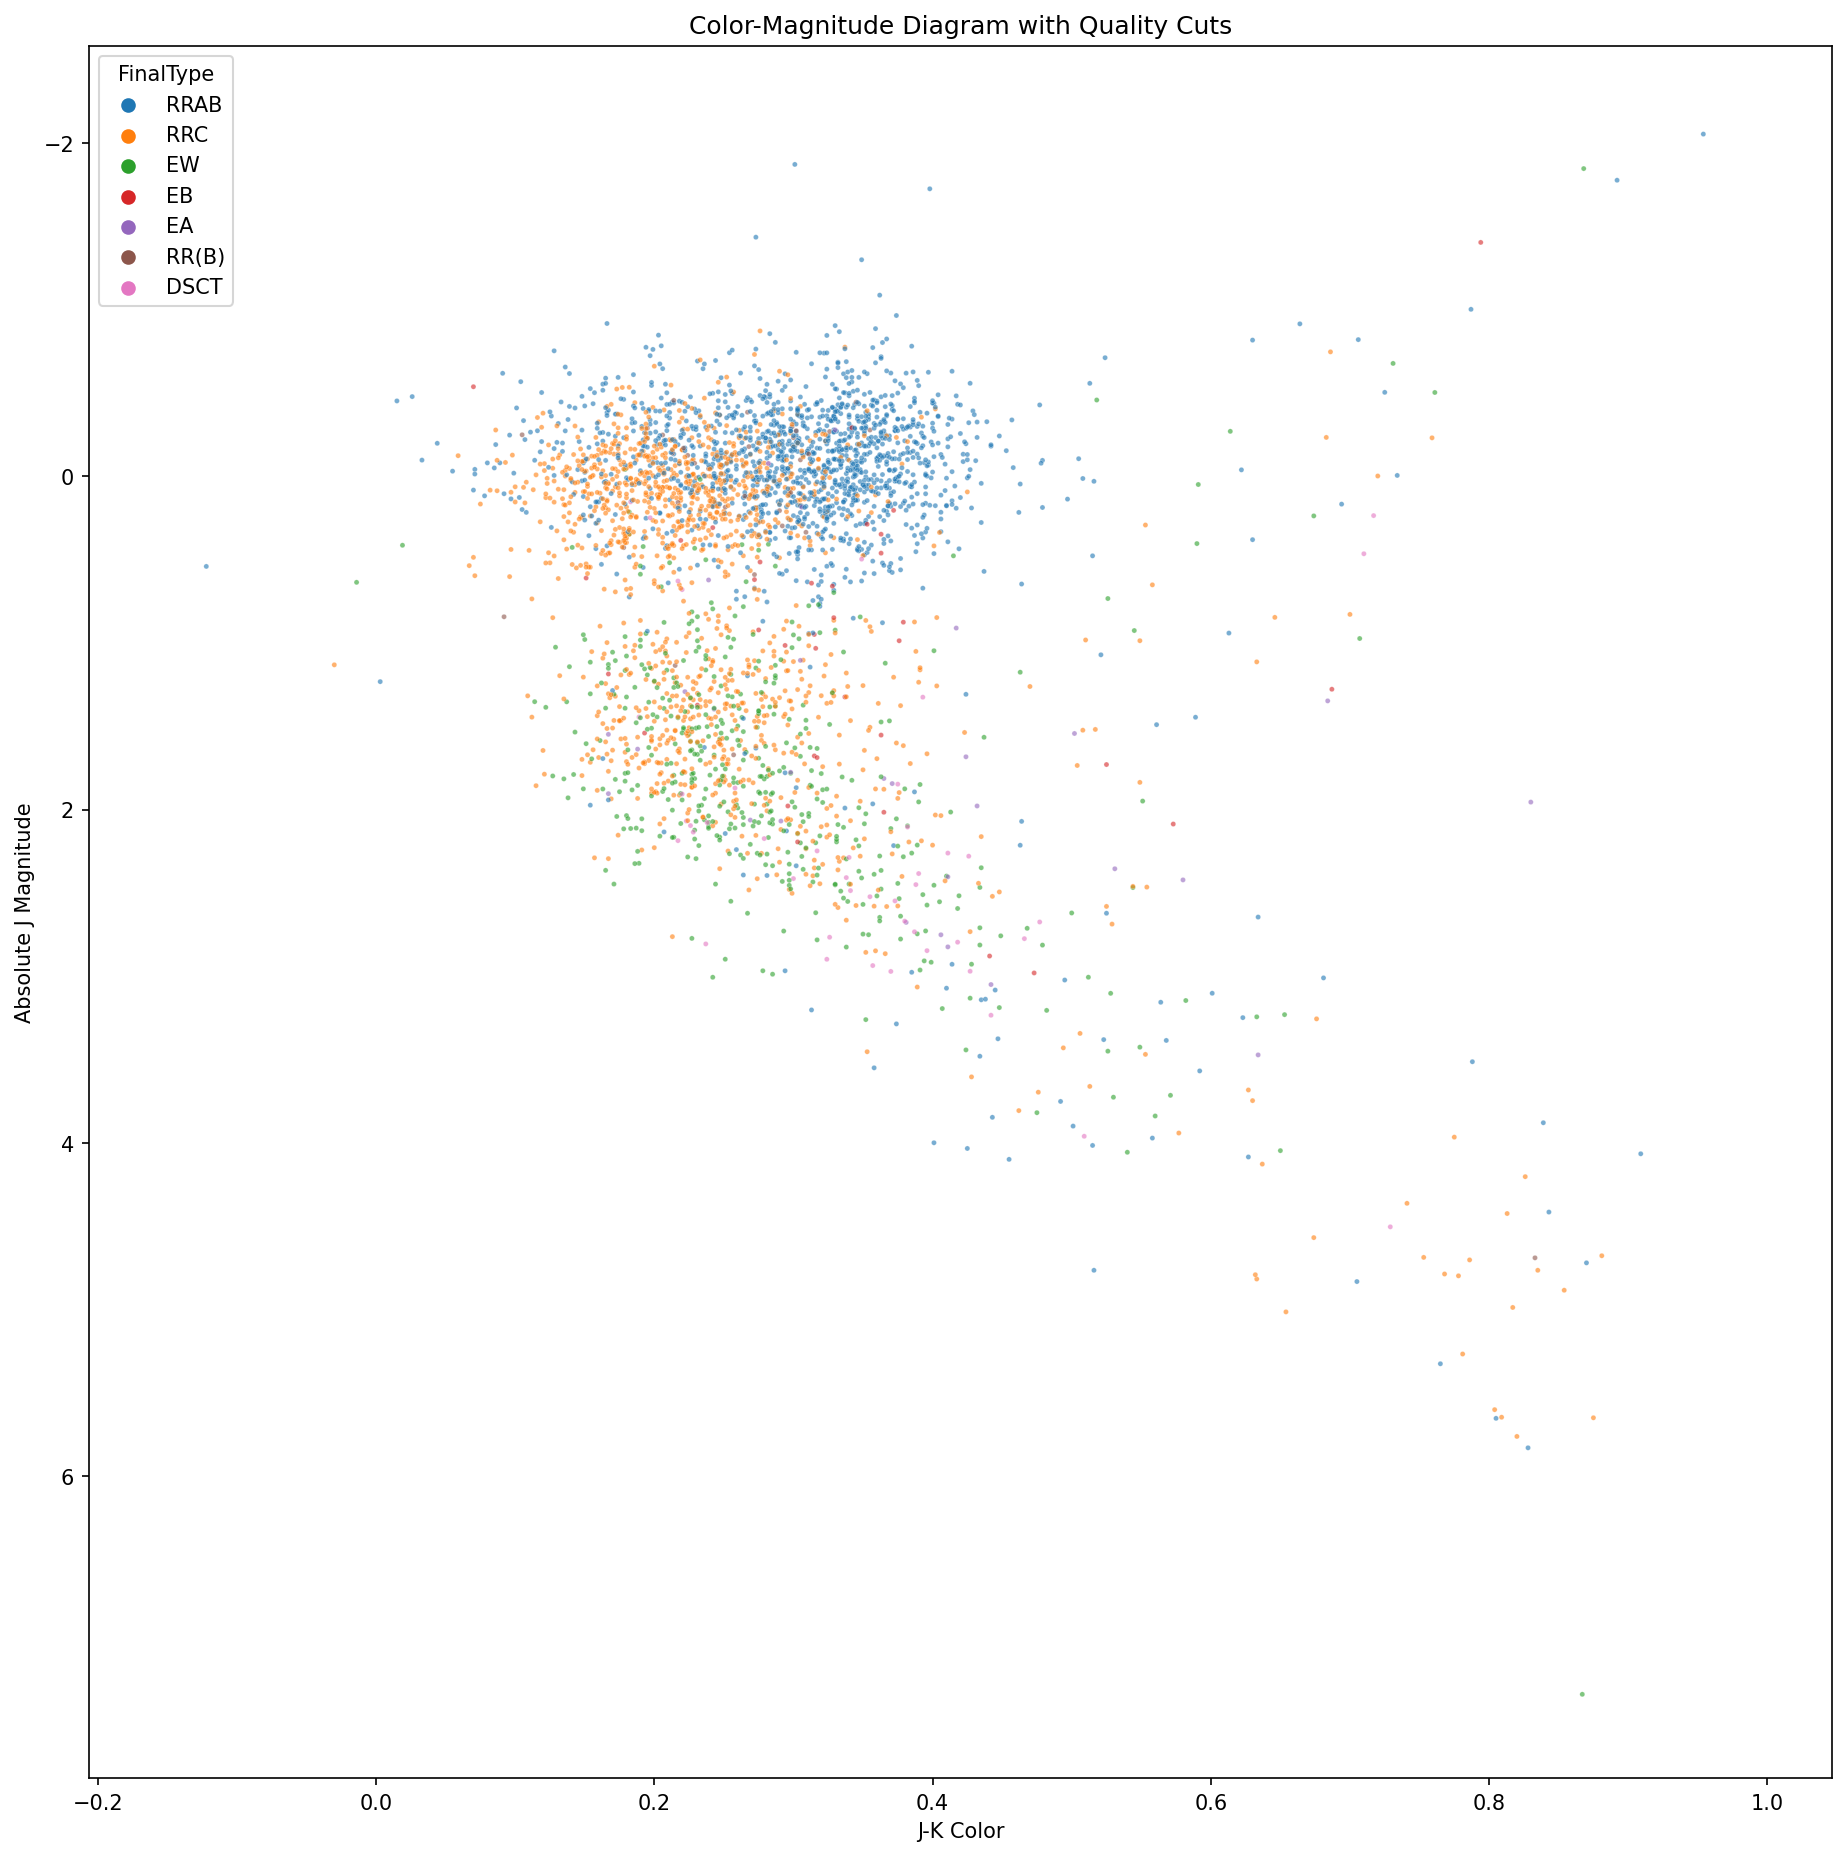

In [184]:
# Plotting
plt.figure(figsize=(15, 15), dpi = 150)
plt.errorbar(
    x=filtered['J-K'], 
    y=filtered['abs_mag_J'], 
    xerr=filtered['J-K_err'], 
    yerr=filtered['abs_mag_J_err'], 
    fmt='none', 
    ecolor='gray', 
    alpha=0
)
sns.scatterplot(
    data=filtered,
    x='J-K',
    y='abs_mag_J',
    hue='FinalType',
    s=6,
    alpha=0.6,
)
plt.gca().invert_yaxis()
plt.xlabel('J-K Color')
plt.ylabel('Absolute J Magnitude')
plt.title('Color-Magnitude Diagram with Quality Cuts')
plt.show()


In [185]:
errors

ASASSN_id  distance  distance_low  distance_high   g_mag  \
0        8590948612      3778          3484           4082  13.245   
4      661428842978      4131          3828           4440  14.566   
7      249108450355      2828          2736           2936  13.397   
8      111669995433      2382          2316           2472  13.186   
11      51540332578      2130          2072           2191  14.293   
...             ...       ...           ...            ...     ...   
25388  137440324131      4474          4150           4908  14.784   
25389  661428930020      3221          3032           3469  14.135   
25391  472447133837      4426          4108           4813  16.119   
25392  283468348278      4310          3755           4843  14.735   
25395   94490254633      5823          5081           6654  15.167   

                          Gaia_name   G_mag  G_mag_err  abs_mag_G  \
0      Gaia DR3 2875539776437822592  12.869      0.012     -0.138   
4      Gaia DR3 2880106185667004928  14.215      0.011      0.796   
7      Gaia DR3 2853512332285518592  13.160      0.010      0.806   
8      Gaia DR3 2880528638650410624  13.047      0.007      0.896   
11      Gaia DR3 422761499325397120  13.595      0.009      0.984   
...                             ...     ...        ...        ...   
25388  Gaia DR3 1945536351631291264  14.641      0.008      1.000   
25389  Gaia DR3 1945532056664053376  14.846      0.006      1.928   
25391  Gaia DR3 2773761352308748032  13.928      0.005      0.698   
25392  Gaia DR3 2422393685595709568  14.706      0.007      1.534   
25395  Gaia DR3 2880380651257051776  14.982      0.007      0.914   

       abs_mag_G_low  ...                      VSX_name  J_minus_K    J-K  \
0              0.038  ...                        GM And      0.336  0.336   
4              0.961  ...                  NSVS 6313844      0.399  0.399   
7              0.877  ...                        GV Peg      0.228  0.228   
8              0.957  ...   ROTSE1 J000044.33 +375034.2      0.216  0.216   
11             1.052  ...                        EW Cas      0.435  0.435   
...              ...  ...                           ...        ...    ...   
25388          1.163  ...                        QY Cas      0.323  0.323   
25389          2.098  ...   PS1-3PI J235912.57+535639.5      0.378  0.378   
25391          0.860  ...           ASAS J235945+1739.5      0.250  0.250   
25392          1.833  ...  ASASSN-V J235944.77-114520.0      0.192  0.192   
25395          1.210  ...          CSS_J235946.8+371110      0.420  0.420   

        J-K_err  sigma_distance  sigma_dist_term    E(B-V)    A_J    E(J-K)  \
0      0.031828           299.0         0.171856  0.039560  0.036  0.020571   
4      0.041110           306.0         0.160850  0.110989  0.101  0.057714   
7      0.030414           100.0         0.076785  0.031868  0.029  0.016571   
8      0.031145            78.0         0.071106  0.087912  0.080  0.045714   
11     0.033601            59.5         0.060659  0.317582  0.289  0.165143   
...         ...             ...              ...       ...    ...       ...   
25388  0.045804           379.0         0.183949  0.127473  0.116  0.066286   
25389  0.044204           218.5         0.147304  0.124176  0.113  0.064571   
25391  0.039825           352.5         0.172943  0.000000  0.000  0.000000   
25392  0.062169           544.0         0.274079  0.000000  0.000  0.000000   
25395  0.061033           786.5         0.293296  0.079121  0.072  0.041143   

       abs_mag_J_err  
0           0.173295  
4           0.164121  
7           0.079927  
8           0.075160  
11          0.072413  
...              ...  
25388       0.186282  
25389       0.150184  
25391       0.174740  
25392       0.275406  
25395       0.295465  

[11925 rows x 47 columns]

In [186]:
rrl_ab = filtered[filtered["ML_classifier_type"] == "RRL_ab"]
rrl_c = filtered[filtered["ML_classifier_type"] == "RRL_c"]
nonvar = filtered[filtered["ML_classifier_type"] == "NonVar"]
eb_ec = filtered[filtered["ML_classifier_type"] == "EB_EC"]
rrl_e = filtered[filtered["ML_classifier_type"] == "RRL_e"]
dsct = filtered[filtered["ML_classifier_type"] == "DSCT"]
eb_ed = filtered[filtered["ML_classifier_type"] == "EB_ED"]
eb_esd = filtered[filtered["ML_classifier_type"] == "EB_ESD"]
rrl_d = filtered[filtered["ML_classifier_type"] == "RRL_d"]

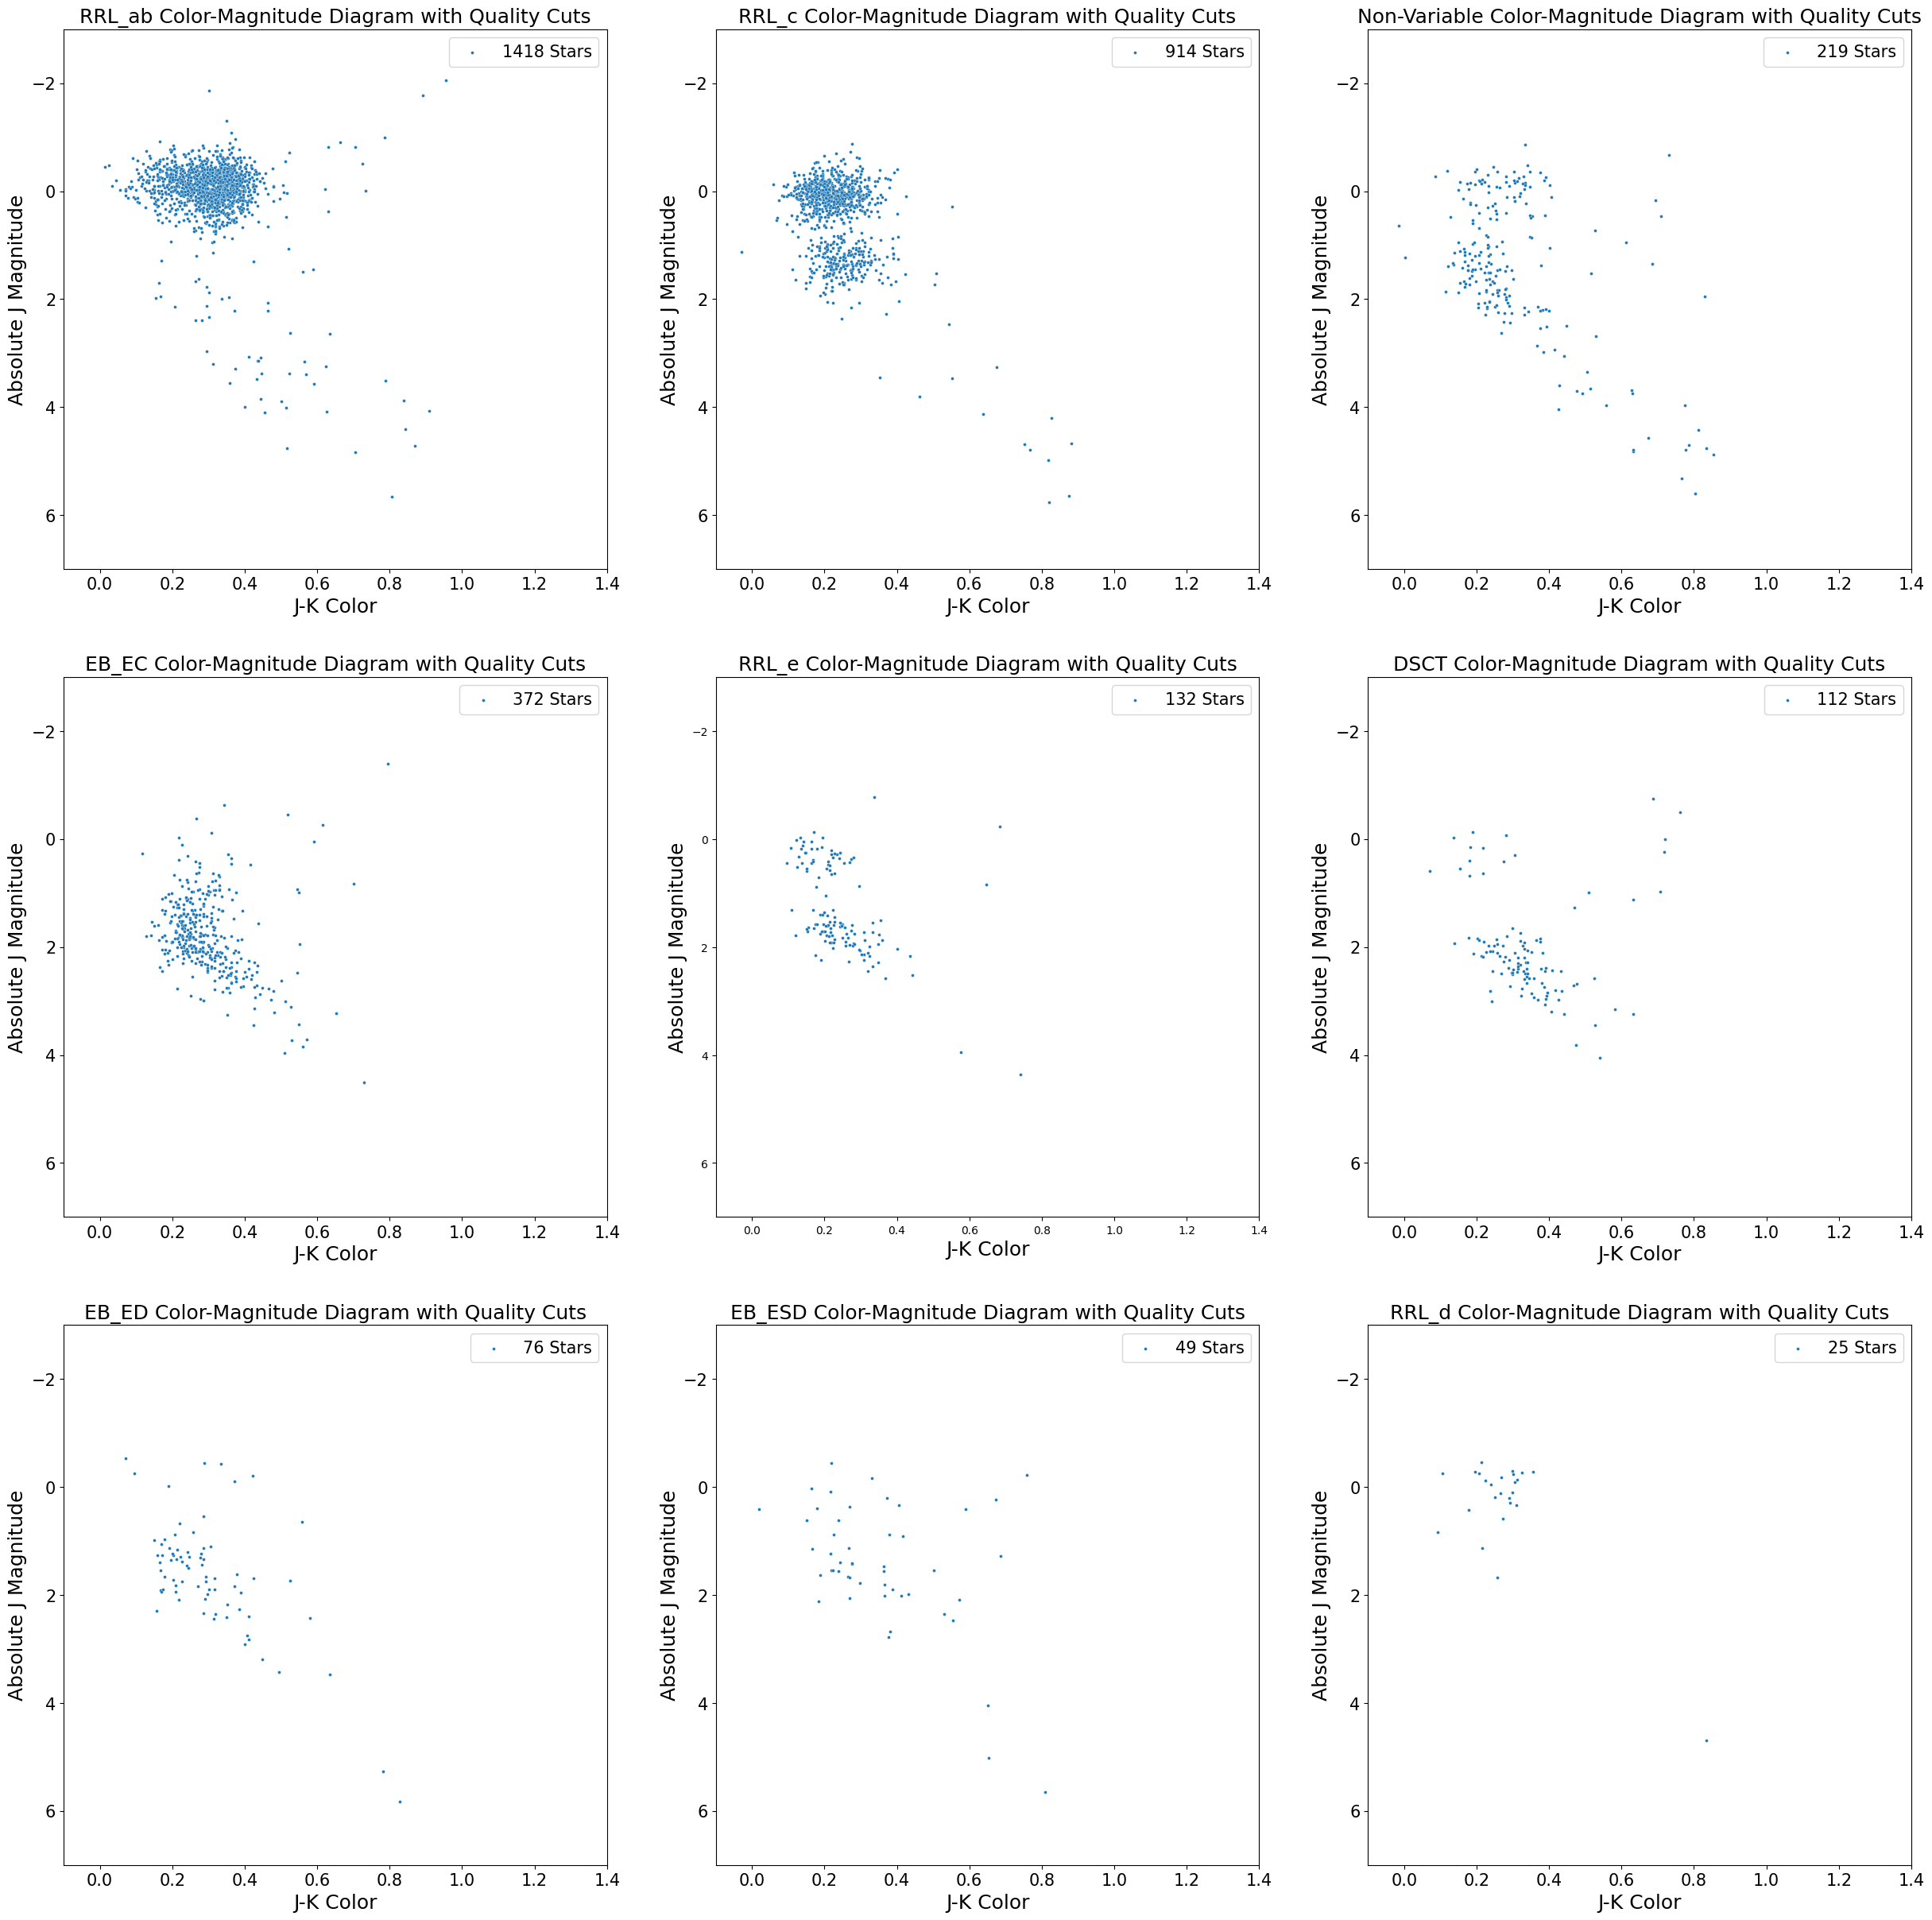

In [187]:
# Plotting
fig = plt.figure(figsize=(30, 30))

ax1 = fig.add_subplot(331)
sns.scatterplot(data=rrl_ab, x='J-K', y='abs_mag_J', s=8, label = f"{len(rrl_ab)} Stars")
ax1.invert_yaxis()
ax1.set_xlabel('J-K Color', size=18)
ax1.set_ylabel('Absolute J Magnitude', size=18)
ax1.set_title('RRL_ab Color-Magnitude Diagram with Quality Cuts', size=18)
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.legend(fontsize=15)
ax1.set_xlim(-0.1, 1.4)
ax1.set_ylim(7, -3)

ax2 = fig.add_subplot(332)
sns.scatterplot(data=rrl_c, x='J-K', y='abs_mag_J', s=8, label = f"{len(rrl_c)} Stars")
ax2.invert_yaxis()
ax2.set_xlabel('J-K Color', size=18)
ax2.set_ylabel('Absolute J Magnitude', size=18)
ax2.set_title('RRL_c Color-Magnitude Diagram with Quality Cuts', size=18)
ax2.tick_params(axis='both', which='major', labelsize=15)
ax2.legend(fontsize=15)
ax2.set_xlim(-0.1, 1.4)
ax2.set_ylim(7, -3)

ax3 = fig.add_subplot(333)
sns.scatterplot(data=nonvar, x='J-K', y='abs_mag_J', s=8, label = f"{len(nonvar)} Stars")
ax3.invert_yaxis()
ax3.set_xlabel('J-K Color', size=18)
ax3.set_ylabel('Absolute J Magnitude', size=18)
ax3.set_title('Non-Variable Color-Magnitude Diagram with Quality Cuts', size=18)
ax3.tick_params(axis='both', which='major', labelsize=15)
ax3.legend(fontsize=15)
ax3.set_xlim(-0.1, 1.4)
ax3.set_ylim(7, -3)

ax4 = fig.add_subplot(334)
sns.scatterplot(data=eb_ec, x='J-K', y='abs_mag_J', s=8, label = f"{len(eb_ec)} Stars")
ax4.invert_yaxis()
ax4.set_xlabel('J-K Color', size=18)
ax4.set_ylabel('Absolute J Magnitude', size=18)
ax4.set_title('EB_EC Color-Magnitude Diagram with Quality Cuts', size=18)
ax4.tick_params(axis='both', which='major', labelsize=15)
ax4.legend(fontsize=15)
ax4.set_xlim(-0.1, 1.4)
ax4.set_ylim(7, -3)

ax5 = fig.add_subplot(335)
sns.scatterplot(data=rrl_e, x='J-K', y='abs_mag_J', s=8, label = f"{len(rrl_e)} Stars")
ax5.invert_yaxis()
ax5.set_xlabel('J-K Color', size=18)
ax5.set_ylabel('Absolute J Magnitude', size=18)
ax5.set_title('RRL_e Color-Magnitude Diagram with Quality Cuts', size=18)
ax5.legend(fontsize=15)
ax5.set_xlim(-0.1, 1.4)
ax5.set_ylim(7, -3)

ax6 = fig.add_subplot(336)
sns.scatterplot(data=dsct, x='J-K', y='abs_mag_J', s=8, label = f"{len(dsct)} Stars")
ax6.invert_yaxis()
ax6.set_xlabel('J-K Color', size=18)
ax6.set_ylabel('Absolute J Magnitude', size=18)
ax6.set_title('DSCT Color-Magnitude Diagram with Quality Cuts', size=18)
ax6.tick_params(axis='both', which='major', labelsize=15)
ax6.legend(fontsize=15)
ax6.set_xlim(-0.1, 1.4)
ax6.set_ylim(7, -3)

ax7 = fig.add_subplot(337)
sns.scatterplot(data=eb_ed, x='J-K', y='abs_mag_J', s=8, label = f"{len(eb_ed)} Stars")
ax7.invert_yaxis()
ax7.set_xlabel('J-K Color', size=18)
ax7.set_ylabel('Absolute J Magnitude', size=18)
ax7.set_title('EB_ED Color-Magnitude Diagram with Quality Cuts', size=18)
ax7.tick_params(axis='both', which='major', labelsize=15)
ax7.legend(fontsize=15)
ax7.set_xlim(-0.1, 1.4)
ax7.set_ylim(7, -3)

ax8 = fig.add_subplot(338)
sns.scatterplot(data=eb_esd, x='J-K', y='abs_mag_J', s=8, label = f"{len(eb_esd)} Stars")
ax8.invert_yaxis()
ax8.set_xlabel('J-K Color', size=18)
ax8.set_ylabel('Absolute J Magnitude', size=18)
ax8.set_title('EB_ESD Color-Magnitude Diagram with Quality Cuts', size=18)
ax8.tick_params(axis='both', which='major', labelsize=15)
ax8.legend(fontsize=15)
ax8.set_xlim(-0.1, 1.4)
ax8.set_ylim(7, -3)

ax9 = fig.add_subplot(339)
sns.scatterplot(data=rrl_d, x='J-K', y='abs_mag_J', s=8, label = f"{len(rrl_d)} Stars")
ax9.invert_yaxis()
ax9.set_xlabel('J-K Color', size=18)
ax9.set_ylabel('Absolute J Magnitude', size=18)
ax9.set_title('RRL_d Color-Magnitude Diagram with Quality Cuts', size=18)
ax9.tick_params(axis='both', which='major', labelsize=15)
ax9.legend(fontsize=15)
ax9.set_xlim(-0.1, 1.4)
ax9.set_ylim(7, -3)

plt.show()

In [188]:
filtered['FinalType'].unique()

array(['RRAB', 'RRC', 'EW', 'EB', 'EA', 'RR(B)', 'DSCT'], dtype=object)

In [189]:
rrl_ab = filtered[filtered["FinalType"] == "RRAB"]
rrl_c = filtered[filtered["FinalType"] == "RRC"]
eb_ec = filtered[(filtered["FinalType"] == "EW") | (filtered["FinalType"] == "EB") | (filtered["FinalType"] == "EA)")]
rrl_e = filtered[filtered["FinalType"] == "RR(B)"]

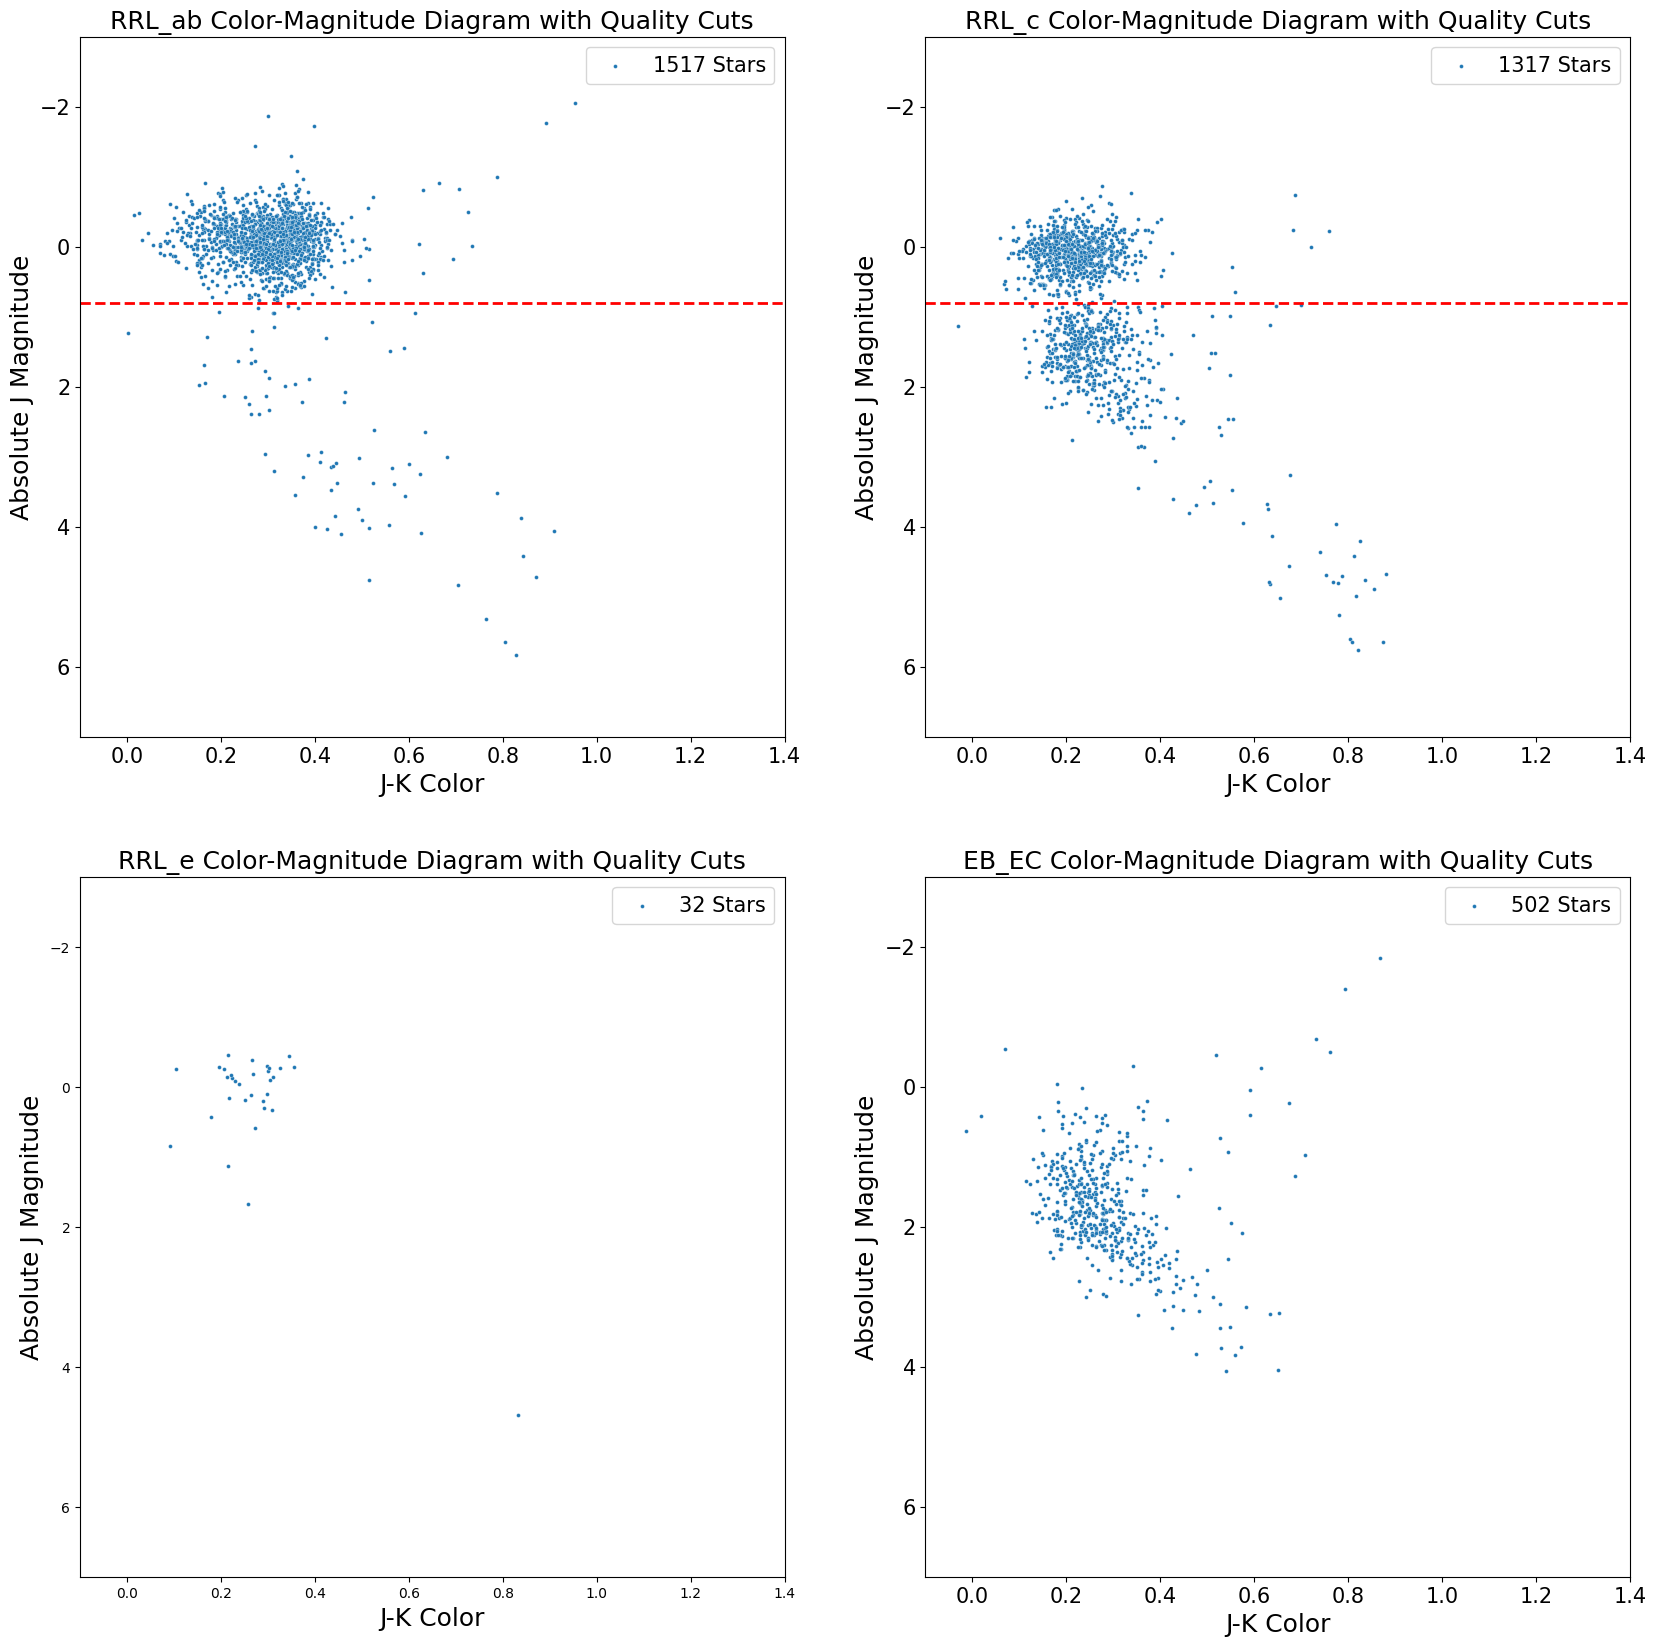

In [190]:
# Plotting
fig = plt.figure(figsize=(20, 20))

ax1 = fig.add_subplot(221)
sns.scatterplot(data=rrl_ab, x='J-K', y='abs_mag_J', s=8, label = f"{len(rrl_ab)} Stars")
ax1.invert_yaxis()
ax1.set_xlabel('J-K Color', size=18)
ax1.set_ylabel('Absolute J Magnitude', size=18)
ax1.set_title('RRL_ab Color-Magnitude Diagram with Quality Cuts', size=18)
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.axhline(y=0.8, color='red', linestyle='--', linewidth=2)
ax1.legend(fontsize=15)
ax1.set_xlim(-0.1, 1.4)
ax1.set_ylim(7, -3)

ax2 = fig.add_subplot(222)
sns.scatterplot(data=rrl_c, x='J-K', y='abs_mag_J', s=8, label = f"{len(rrl_c)} Stars")
ax2.invert_yaxis()
ax2.set_xlabel('J-K Color', size=18)
ax2.set_ylabel('Absolute J Magnitude', size=18)
ax2.set_title('RRL_c Color-Magnitude Diagram with Quality Cuts', size=18)
ax2.tick_params(axis='both', which='major', labelsize=15)
ax2.axhline(y=0.8, color='red', linestyle='--', linewidth=2)
ax2.legend(fontsize=15)
ax2.set_xlim(-0.1, 1.4)
ax2.set_ylim(7, -3)

ax5 = fig.add_subplot(223)
sns.scatterplot(data=rrl_e, x='J-K', y='abs_mag_J', s=8, label = f"{len(rrl_e)} Stars")
ax5.invert_yaxis()
ax5.set_xlabel('J-K Color', size=18)
ax5.set_ylabel('Absolute J Magnitude', size=18)
ax5.set_title('RRL_e Color-Magnitude Diagram with Quality Cuts', size=18)
ax5.legend(fontsize=15)
ax5.set_xlim(-0.1, 1.4)
ax5.set_ylim(7, -3)

ax4 = fig.add_subplot(224)
sns.scatterplot(data=eb_ec, x='J-K', y='abs_mag_J', s=8, label = f"{len(eb_ec)} Stars")
ax4.invert_yaxis()
ax4.set_xlabel('J-K Color', size=18)
ax4.set_ylabel('Absolute J Magnitude', size=18)
ax4.set_title('EB_EC Color-Magnitude Diagram with Quality Cuts', size=18)
ax4.tick_params(axis='both', which='major', labelsize=15)
ax4.legend(fontsize=15)
ax4.set_xlim(-0.1, 1.4)
ax4.set_ylim(7, -3)

plt.show()

In [191]:
rr_mask = filtered["FinalType"].isin(["RRAB", "RRC"]) & (filtered["abs_mag_J"] > 0.8)
rr_bright_list = filtered[rr_mask]
rr_bright_list

ASASSN_id  distance  distance_low  distance_high   g_mag  \
35     120260247366       634           625            640  14.093   
70     549756977370       745           733            757  11.637   
76     214748600537       335           334            338   9.829   
93     171799218028      2537          2405           2647  14.547   
102    377957596435      1026          1012           1042  12.501   
...             ...       ...           ...            ...     ...   
25223  420907501725       661           651            676  12.041   
25256  197569271697       395           391            399  10.906   
25268  403727106487       838           828            848  12.451   
25349  111670276750       921           908            932  12.101   
25381  171799410708       219           218            220  12.026   

                          Gaia_name   G_mag  G_mag_err  abs_mag_G  \
35      Gaia DR3 384958644592311040  13.990      0.003      4.762   
70     Gaia DR3 2335666854095904896  11.383      0.003      2.022   
76     Gaia DR3 2798428345921128832   9.775      0.003      2.102   
93     Gaia DR3 2800636852464997248  14.336      0.004      2.217   
102    Gaia DR3 2793913712522910592  12.403      0.005      2.299   
...                             ...     ...        ...        ...   
25223  Gaia DR3 6537919614494967808  11.853      0.006      2.714   
25256  Gaia DR3 2823187148755749376  10.539      0.003      2.193   
25268  Gaia DR3 2640144090800483840  12.257      0.007      2.593   
25349  Gaia DR3 2874897661647361024  11.942      0.003      1.927   
25381  Gaia DR3 2846673747917949568  11.583      0.003      4.821   

       abs_mag_G_low  ...                      VSX_name  J_minus_K    J-K  \
35             4.793  ...          CSS_J000427.4+440349      0.358  0.358   
70             2.057  ...  ASASSN-V J001026.66-245801.2      0.246  0.246   
76             2.108  ...           ASAS J001131+1939.6      0.239  0.239   
93             2.333  ...          CSS_J001505.0+224800      0.189  0.189   
102            2.329  ...           ASAS J001658+1801.7      0.189  0.189   
...              ...  ...                           ...        ...    ...   
25223          2.747  ...           ASAS J233858-3830.3      0.229  0.229   
25256          2.215  ...           ASAS J234302+2032.0      0.264  0.264   
25268          2.619  ...           ASAS J234439-0148.6      0.224  0.224   
25349          1.958  ...                     V0713 And      0.217  0.217   
25381          4.839  ...                  NSVS 9057868      0.428  0.428   

        J-K_err  sigma_distance  sigma_dist_term    E(B-V)    A_J    E(J-K)  \
35     0.038210             7.5         0.025688  0.071429  0.065  0.037143   
70     0.029069            12.0         0.034977  0.000000  0.000  0.000000   
76     0.032202             2.0         0.012964  0.015385  0.014  0.008000   
93     0.048877           121.0         0.103566  0.031868  0.029  0.016571   
102    0.030480            15.0         0.031747  0.015385  0.014  0.008000   
...         ...             ...              ...       ...    ...       ...   
25223  0.033422            12.5         0.041064  0.012088  0.011  0.006286   
25256  0.029732             4.0         0.021990  0.118681  0.108  0.061714   
25268  0.036125            10.0         0.025913  0.015385  0.014  0.008000   
25349  0.033302            12.0         0.028293  0.063736  0.058  0.033143   
25381  0.031890             1.0         0.009915  0.019780  0.018  0.010286   

       abs_mag_J_err  
35          0.037123  
70          0.041320  
76          0.029087  
93          0.106581  
102         0.039228  
...              ...  
25223       0.048616  
25256       0.031626  
25268       0.035347  
25349       0.038198  
25381       0.026030  

[629 rows x 47 columns]

In [192]:
filtered_new["FinalType"].unique()

array(['RRAB', 'RRC', 'ECLIPSING', 'RR(B)', 'DSCT', 'LPV_MIRA_AGB_C',
       'BY+UV', 'RC', 'CONSTANTA', 'TRU', 'L:'], dtype=object)

In [193]:
filtered_new = filtered[~filtered["ASASSN_id"].isin(rr_bright_list["ASASSN_id"])]
rrl_ab = filtered_new[filtered_new["FinalType"] == "RRAB"]
rrl_c = filtered_new[filtered_new["FinalType"] == "RRC"]
eclipsing = filtered_new[(filtered_new["FinalType"] == "EW") | (filtered_new["FinalType"] == "EB") | (filtered_new["FinalType"] == "EA)")]
rrl_b = filtered_new[filtered_new["FinalType"] == "RR(B)"]
dsct = filtered_new[filtered_new["FinalType"] == "DSCT"]

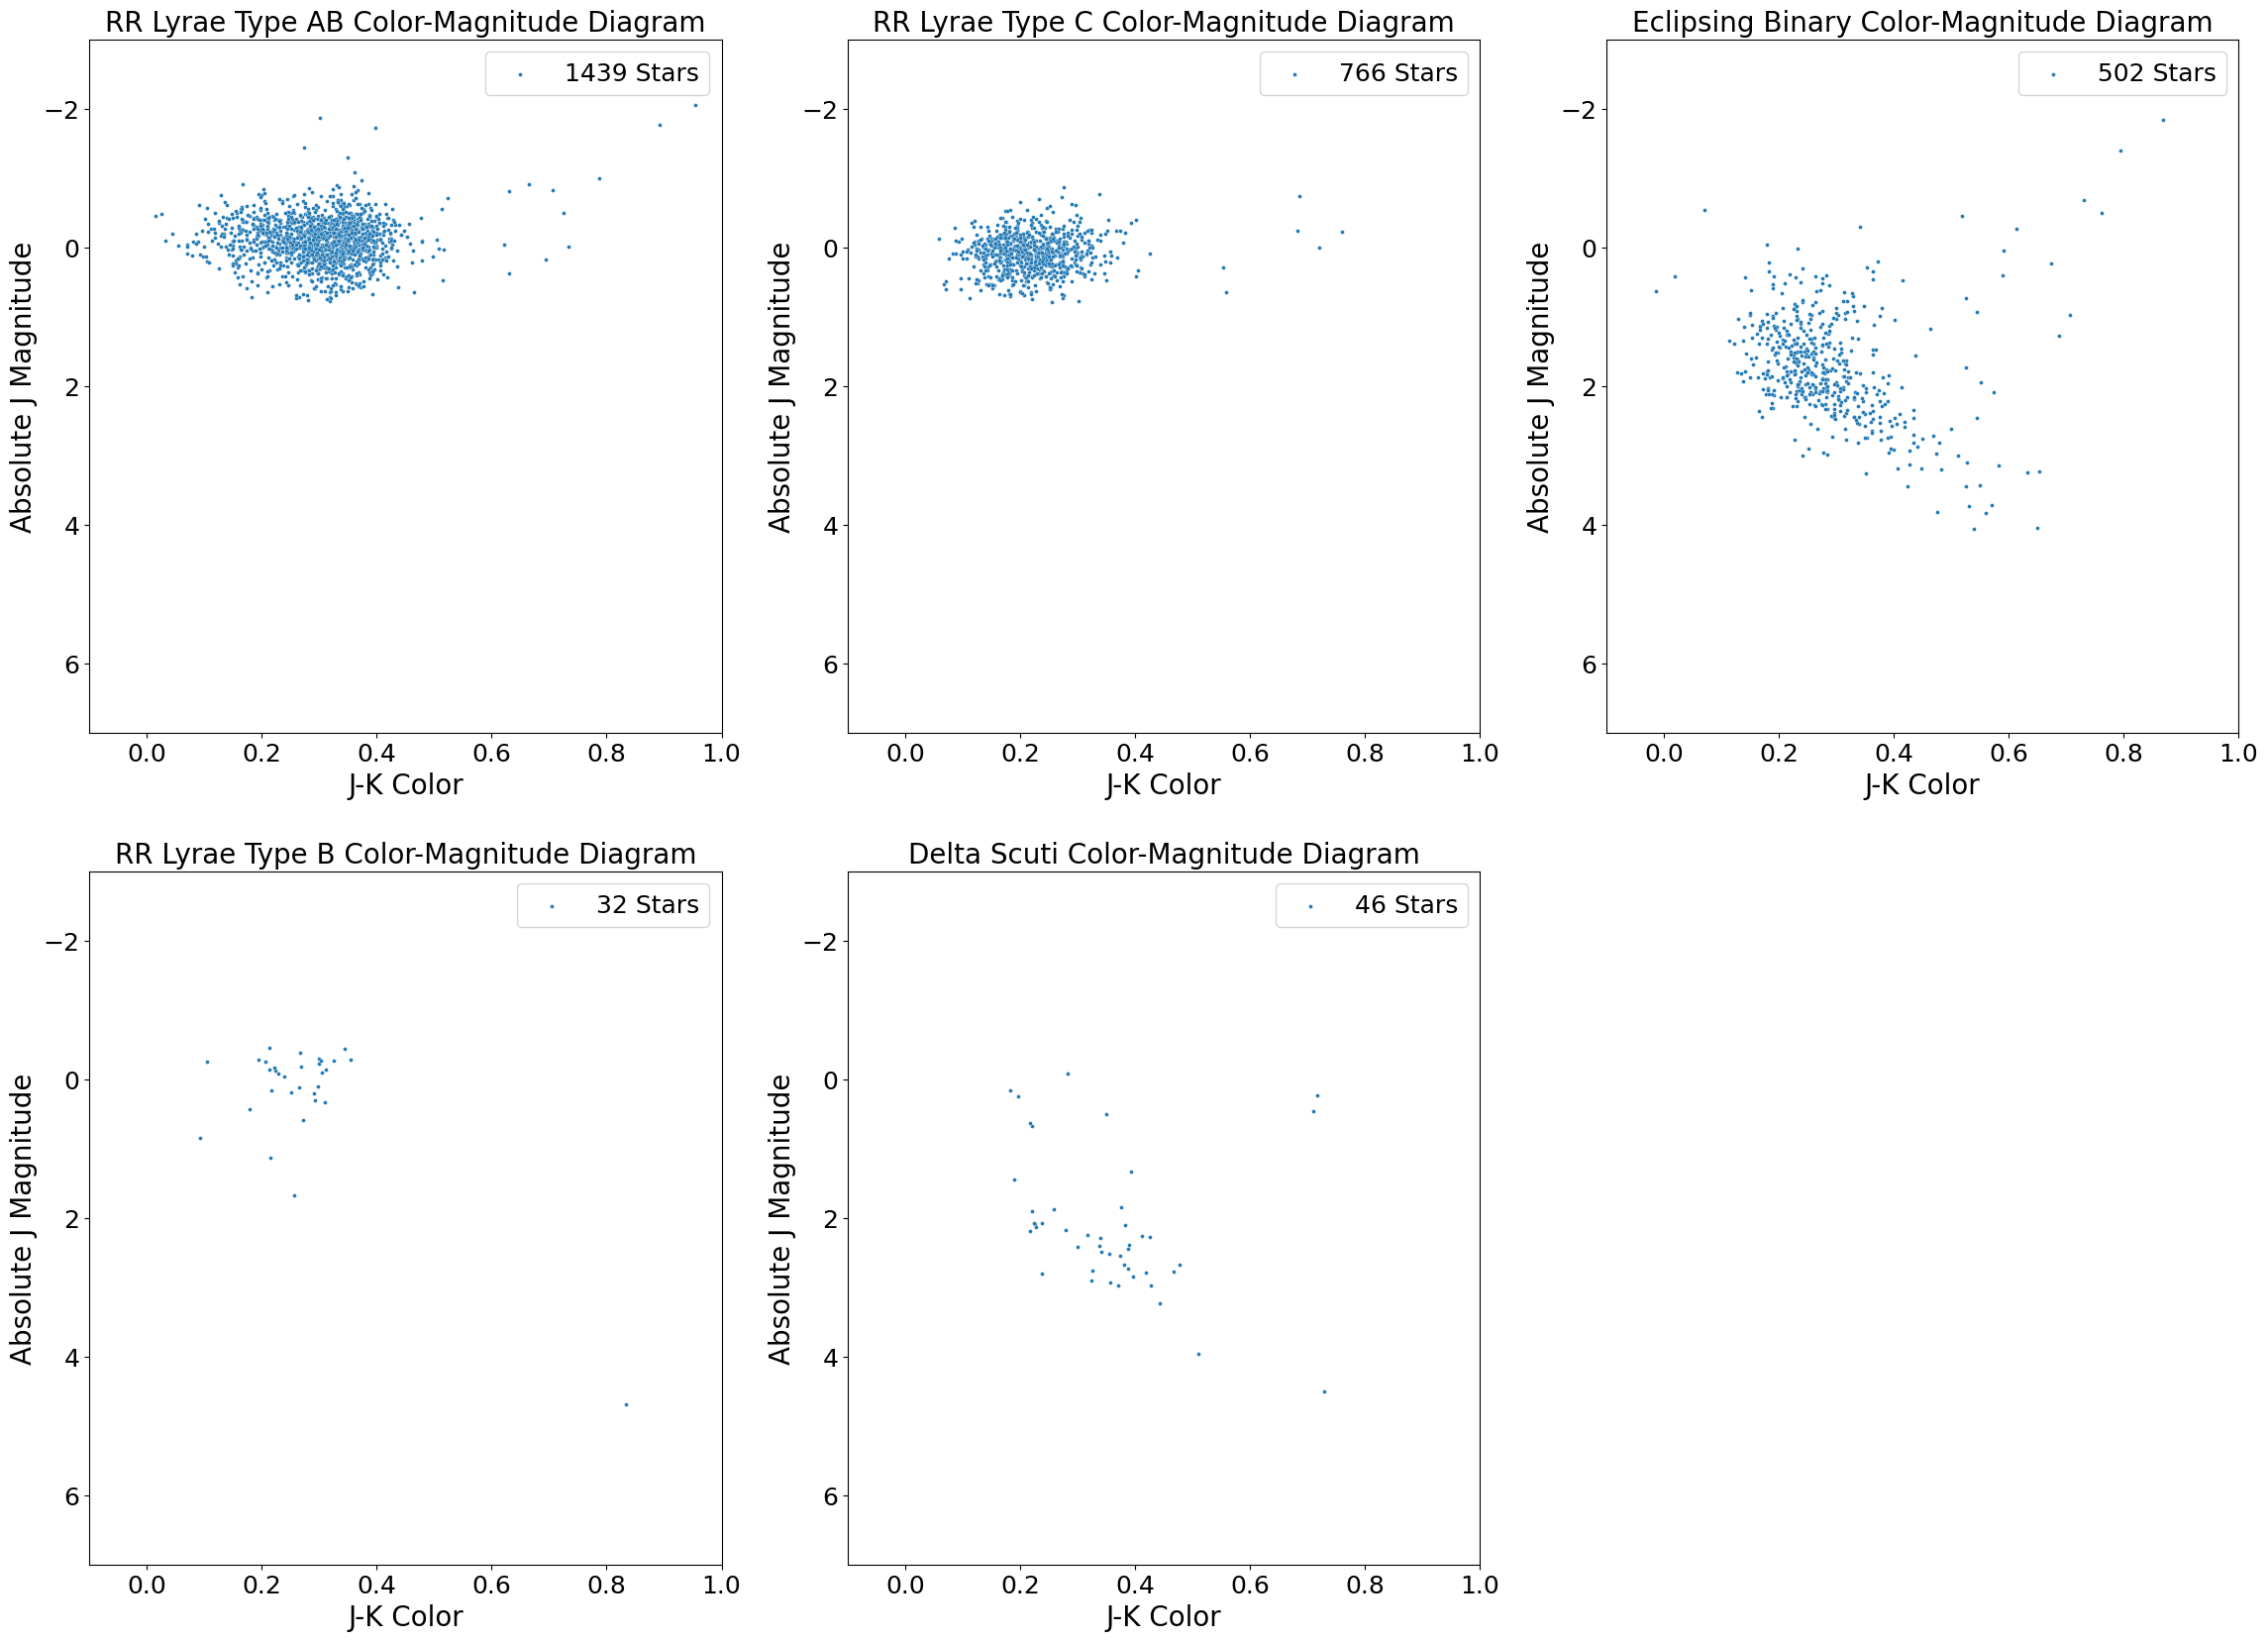

In [244]:
# Plotting
fig = plt.figure(figsize=(28, 20))

ax1 = fig.add_subplot(231)
sns.scatterplot(data=rrl_ab, x='J-K', y='abs_mag_J', s=8, label = f"{len(rrl_ab)} Stars")
ax1.invert_yaxis()
ax1.set_xlabel('J-K Color', size=20)
ax1.set_ylabel('Absolute J Magnitude', size=20)
ax1.set_title('RR Lyrae Type AB Color-Magnitude Diagram', size=20)
ax1.tick_params(axis='both', which='major', labelsize=18)
ax1.legend(fontsize=18)
ax1.set_xlim(-0.1, 1)
ax1.set_ylim(7, -3)

ax2 = fig.add_subplot(232)
sns.scatterplot(data=rrl_c, x='J-K', y='abs_mag_J', s=8, label = f"{len(rrl_c)} Stars")
ax2.invert_yaxis()
ax2.set_xlabel('J-K Color', size=20)
ax2.set_ylabel('Absolute J Magnitude', size=20)
ax2.set_title('RR Lyrae Type C Color-Magnitude Diagram', size=20)
ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.legend(fontsize=18)
ax2.set_xlim(-0.1, 1)
ax2.set_ylim(7, -3)

ax3 = fig.add_subplot(233)
sns.scatterplot(data=eclipsing, x='J-K', y='abs_mag_J', s=8, label = f"{len(eclipsing)} Stars")
ax3.invert_yaxis()
ax3.set_xlabel('J-K Color', size=20)
ax3.set_ylabel('Absolute J Magnitude', size=20)
ax3.set_title('Eclipsing Binary Color-Magnitude Diagram', size=20)
ax3.tick_params(axis='both', which='major', labelsize=18)
ax3.legend(fontsize=18)
ax3.set_xlim(-0.1, 1)
ax3.set_ylim(7, -3)

ax4 = fig.add_subplot(234)
sns.scatterplot(data=rrl_b, x='J-K', y='abs_mag_J', s=8, label = f"{len(rrl_b)} Stars")
ax4.invert_yaxis()
ax4.set_xlabel('J-K Color', size=20)
ax4.set_ylabel('Absolute J Magnitude', size=20)
ax4.set_title('RR Lyrae Type B Color-Magnitude Diagram', size=20)
ax4.tick_params(axis='both', which='major', labelsize=18)
ax4.legend(fontsize=18)
ax4.set_xlim(-0.1, 1)
ax4.set_ylim(7, -3)

ax5 = fig.add_subplot(235)
sns.scatterplot(data=dsct, x='J-K', y='abs_mag_J', s=8, label = f"{len(dsct)} Stars")
ax5.invert_yaxis()
ax5.set_xlabel('J-K Color', size=20)
ax5.set_ylabel('Absolute J Magnitude', size=20)
ax5.set_title('Delta Scuti Color-Magnitude Diagram', size=20)
ax5.tick_params(axis='both', which='major', labelsize=18)
ax5.legend(fontsize=18)
ax5.set_xlim(-0.1, 1)
ax5.set_ylim(7, -3)

plt.savefig('squares.png', format='png', dpi=1000)
plt.show()

In [195]:
filtered_new["FinalType"] = filtered_new["FinalType"].replace("EW", "ECLIPSING")
filtered_new["FinalType"] = filtered_new["FinalType"].replace("EB", "ECLIPSING")
filtered_new["FinalType"] = filtered_new["FinalType"].replace("EA", "ECLIPSING")

/var/folders/kv/b7ycyzg17v3f_grsjzhtpwt80000gn/T/ipykernel_3875/3731906875.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/kv/b7ycyzg17v3f_grsjzhtpwt80000gn/T/ipykernel_3875/3731906875.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/kv/b7ycyzg17v3f_grsjzhtpwt80000gn/T/ipykernel_3875/3731906875.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

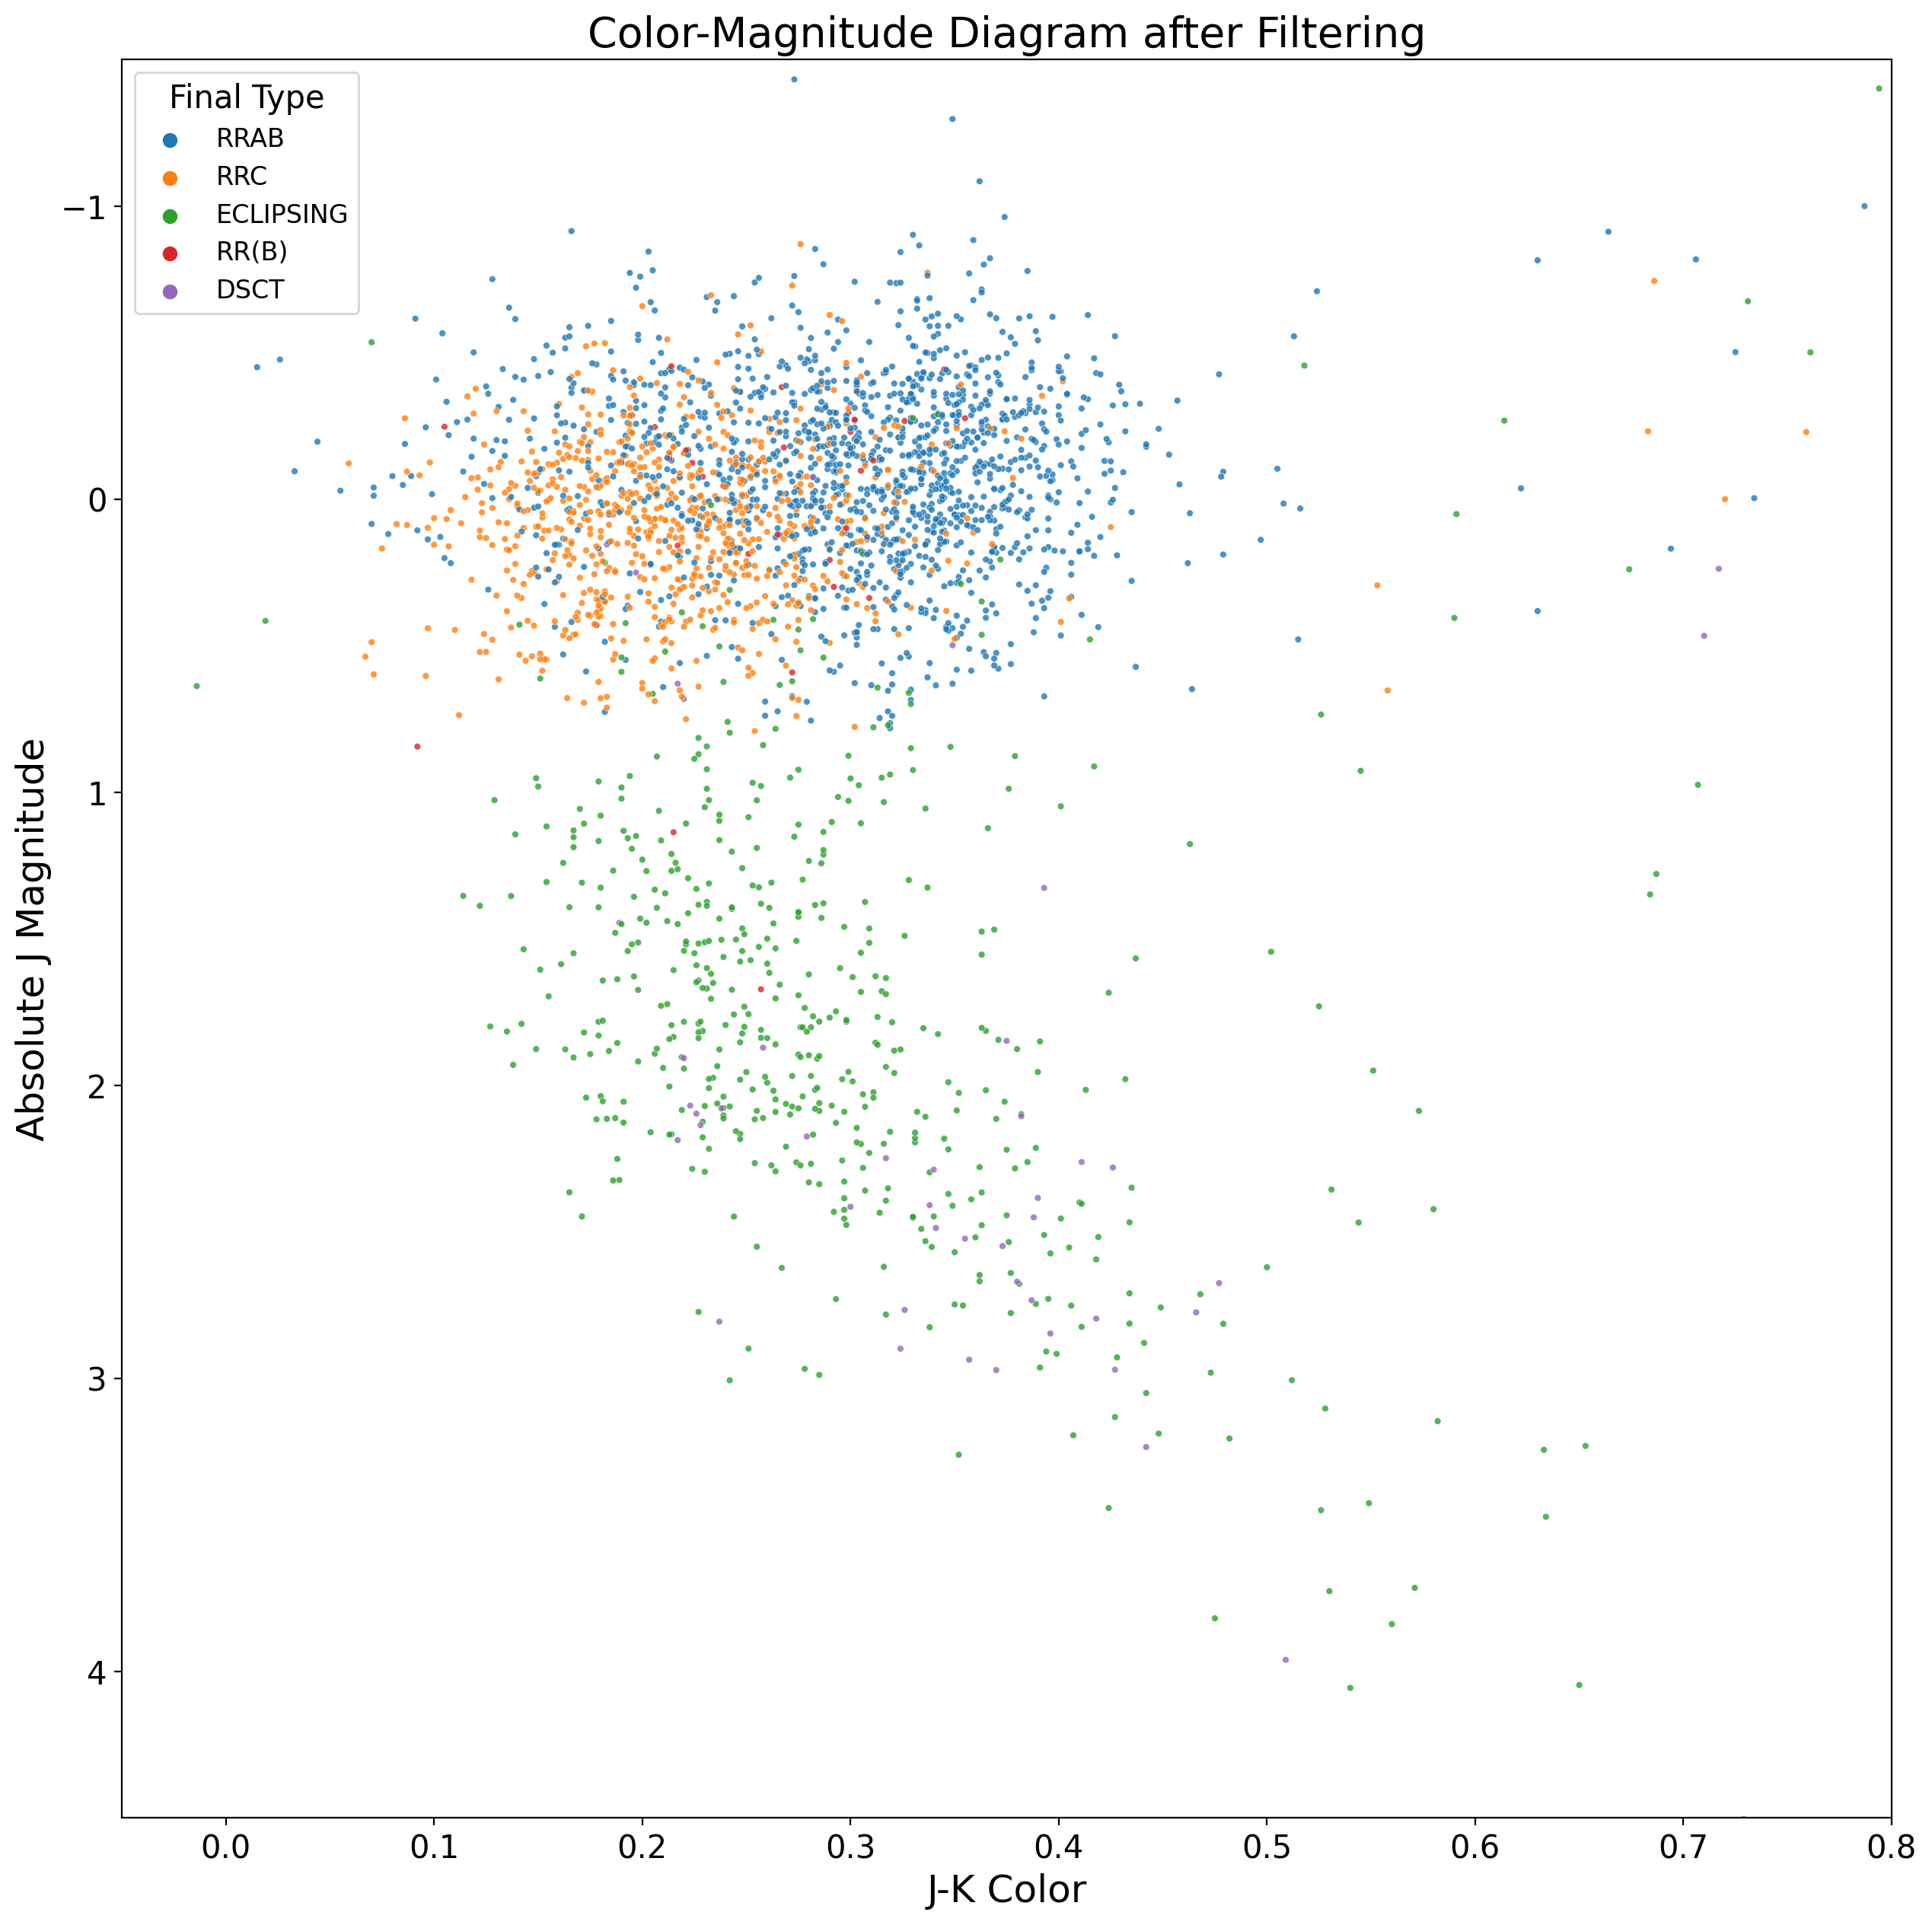

In [226]:
# Plotting
plt.figure(figsize=(15, 15), dpi = 200)
sns.scatterplot(data=filtered_new, x='J-K', y='abs_mag_J', hue='FinalType', s=10, alpha=0.8)

plt.gca().invert_yaxis()
plt.xlabel('J-K Color', size=18)
plt.ylabel('Absolute J Magnitude', size=18)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(title="Final Type", fontsize=12, title_fontsize=15)
plt.xlim(-0.05, 0.8)
plt.ylim(4.5, -1.5)
plt.title('Color-Magnitude Diagram after Filtering', size=20)

plt.savefig('colormag.png', format='png', dpi=1000)
plt.show()

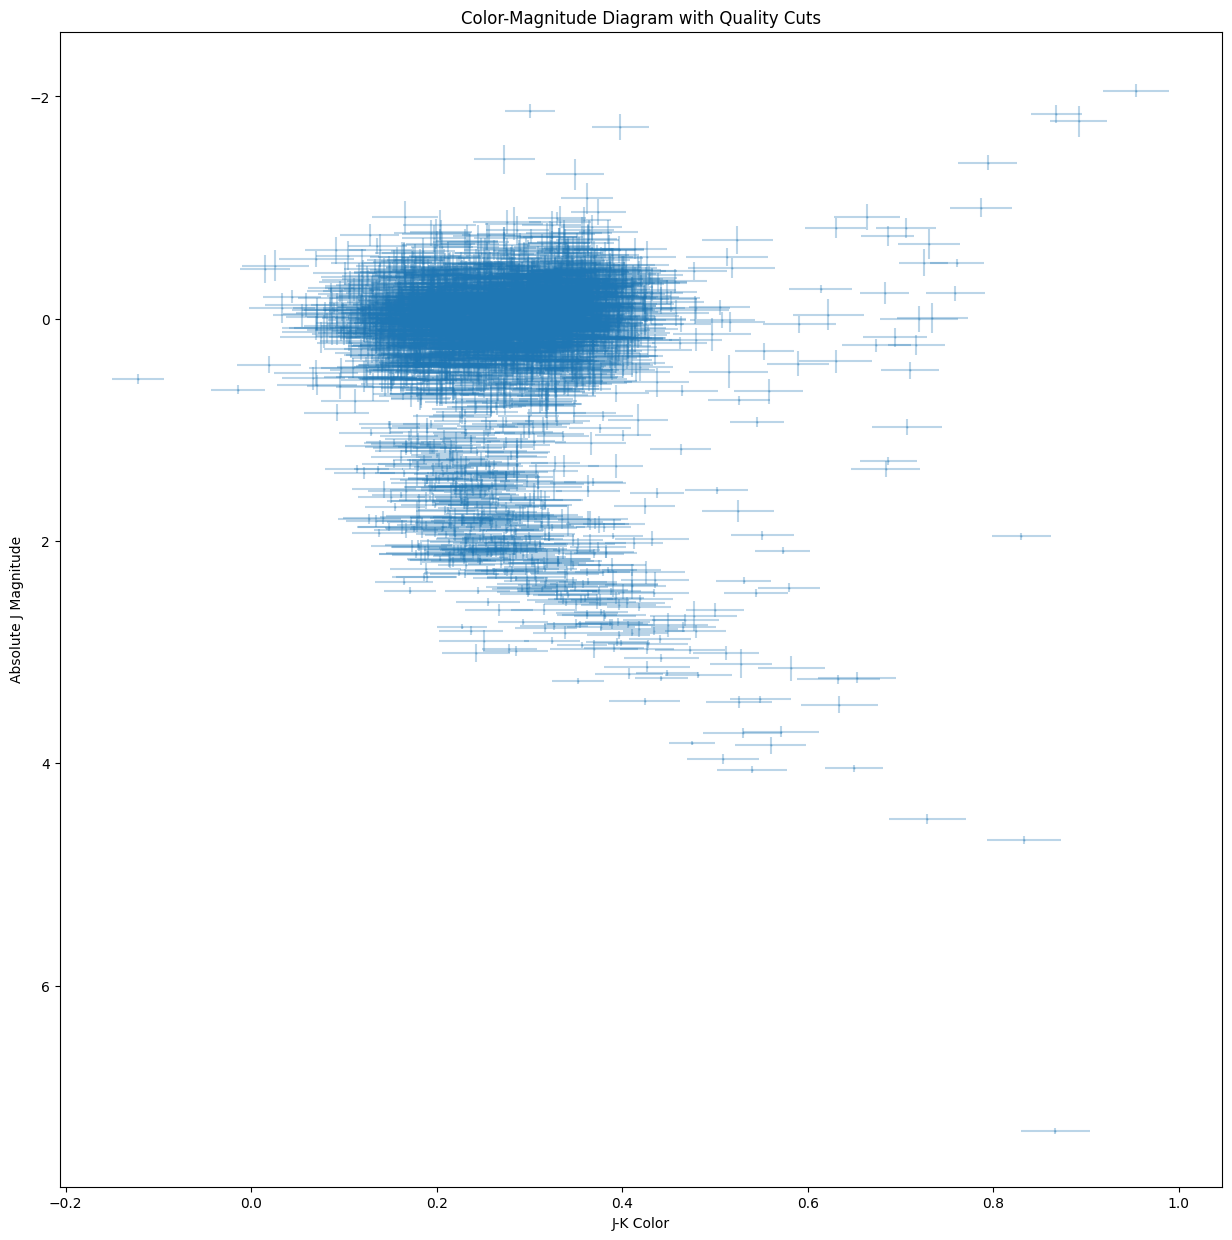

In [197]:
# Plotting
plt.figure(figsize=(15, 15), dpi=100)
plt.errorbar(x = filtered_new['J-K'], y = filtered_new['abs_mag_J'], xerr=filtered_new['J-K_err'], yerr=filtered_new['abs_mag_J_err'], fmt='.', markersize=1, alpha=0.3)
plt.gca().invert_yaxis()
plt.xlabel('J-K Color')
plt.ylabel('Absolute J Magnitude')
plt.title('Color-Magnitude Diagram with Quality Cuts')
plt.show()

In [198]:
filtered.groupby("FinalType").agg("count").reset_index().sort_values(by="ASASSN_id", ascending=False)

FinalType  ASASSN_id  distance  distance_low  distance_high  g_mag  \
5      RRAB       1517      1517          1517           1517   1517   
6       RRC       1317      1317          1317           1317   1317   
3        EW        466       466           466            466    466   
0      DSCT         46        46            46             46     46   
2        EB         36        36            36             36     36   
4     RR(B)         32        32            32             32     32   
1        EA         28        28            28             28     28   

   Gaia_name  G_mag  G_mag_err  abs_mag_G  ...  VSX_name  J_minus_K   J-K  \
5       1517   1517       1517       1517  ...      1517       1517  1517   
6       1317   1317       1317       1317  ...      1317       1317  1317   
3        466    466        466        466  ...       466        466   466   
0         46     46         46         46  ...        46         46    46   
2         36     36         36         36  ...        36         36    36   
4         32     32         32         32  ...        32         32    32   
1         28     28         28         28  ...        28         28    28   

   J-K_err  sigma_distance  sigma_dist_term  E(B-V)   A_J  E(J-K)  \
5     1517            1517             1517    1517  1517    1517   
6     1317            1317             1317    1317  1317    1317   
3      466             466              466     466   466     466   
0       46              46               46      46    46      46   
2       36              36               36      36    36      36   
4       32              32               32      32    32      32   
1       28              28               28      28    28      28   

   abs_mag_J_err  
5           1517  
6           1317  
3            466  
0             46  
2             36  
4             32  
1             28  

[7 rows x 47 columns]

In [199]:
filtered_rr = filtered_new[
    (filtered_new["FinalType"] == "RRAB") |
    (filtered_new["FinalType"] == "RRC") |
    (filtered_new["FinalType"] == "RR(B)")
]
filtered_rr

ASASSN_id  distance  distance_low  distance_high   g_mag  \
7      249108450355      2828          2736           2936  13.397   
8      111669995433      2382          2316           2472  13.186   
21     489626456195       788           773            806  10.729   
22     343598279853      3578          3420           3758  13.989   
29     386548171330      1874          1796           1941  12.261   
...             ...       ...           ...            ...     ...   
25352   85900561705      1205          1180           1230  11.667   
25353  395137554459      2114          2029           2198  12.611   
25358  661428743124      1911          1816           2018  12.260   
25359  627065854252      2928          2806           3045  12.996   
25386   34361049219      4110          3861           4416  16.934   

                          Gaia_name   G_mag  G_mag_err  abs_mag_G  \
7      Gaia DR3 2853512332285518592  13.160      0.010      0.806   
8      Gaia DR3 2880528638650410624  13.047      0.007      0.896   
21     Gaia DR3 2336550174250087936  10.310      0.014      0.827   
22     Gaia DR3 4702887900907901184  13.686      0.013      0.841   
29     Gaia DR3 2414817603803476864  11.991      0.010      0.627   
...                             ...     ...        ...        ...   
25352  Gaia DR3 1944108945011315200  11.556      0.004      0.812   
25353  Gaia DR3 2334529752915355520  12.401      0.011      0.775   
25358  Gaia DR3 2765589163416465792  12.065      0.010      0.465   
25359  Gaia DR3 6521271603997336832  12.812      0.006      0.439   
25386  Gaia DR3 1921524735659618816  13.199      0.012     -0.136   

       abs_mag_G_low  ...                     VSX_name  J_minus_K    J-K  \
7              0.877  ...                       GV Peg      0.228  0.228   
8              0.957  ...  ROTSE1 J000044.33 +375034.2      0.216  0.216   
21             0.869  ...                       RU Scl      0.320  0.320   
22             0.939  ...                        NSV 5      0.202  0.202   
29             0.719  ...                       UU Cet      0.341  0.341   
...              ...  ...                          ...        ...    ...   
25352          0.858  ...                     CzeV1295      0.218  0.218   
25353          0.865  ...                       TX Scl      0.328  0.328   
25358          0.575  ...                    V0618 Peg      0.303  0.303   
25359          0.532  ...                       CZ Phe      0.268  0.268   
25386         -0.000  ...                       DY And      0.333  0.333   

        J-K_err  sigma_distance  sigma_dist_term    E(B-V)    A_J    E(J-K)  \
7      0.030414           100.0         0.076785  0.031868  0.029  0.016571   
8      0.031145            78.0         0.071106  0.087912  0.080  0.045714   
21     0.030610            16.5         0.045469  0.000000  0.000  0.000000   
22     0.036878           169.0         0.102565  0.025275  0.023  0.013143   
29     0.035355            72.5         0.084008  0.000000  0.000  0.000000   
...         ...             ...              ...       ...    ...       ...   
25352  0.031113            25.0         0.045051  0.110989  0.101  0.057714   
25353  0.031145            84.5         0.086797  0.000000  0.000  0.000000   
25358  0.031113           101.0         0.114766  0.063736  0.058  0.033143   
25359  0.036797           119.5         0.088624  0.013187  0.012  0.006857   
25386  0.033302           277.5         0.146614  0.087912  0.080  0.045714   

       abs_mag_J_err  
7           0.079927  
8           0.075160  
21          0.051414  
22          0.105361  
29          0.087649  
...              ...  
25352       0.051143  
25353       0.089793  
25358       0.117000  
25359       0.092653  
25386       0.148471  

[2237 rows x 47 columns]

In [200]:
ra_rad = np.radians(filtered_rr['VSX_RA'])
dec_rad = np.radians(filtered_rr['VSX_Dec'])

x = filtered_rr['distance'] * np.cos(dec_rad) * np.cos(ra_rad)
y = filtered_rr['distance'] * np.cos(dec_rad) * np.sin(ra_rad)
z = filtered_rr['distance'] * np.sin(dec_rad)

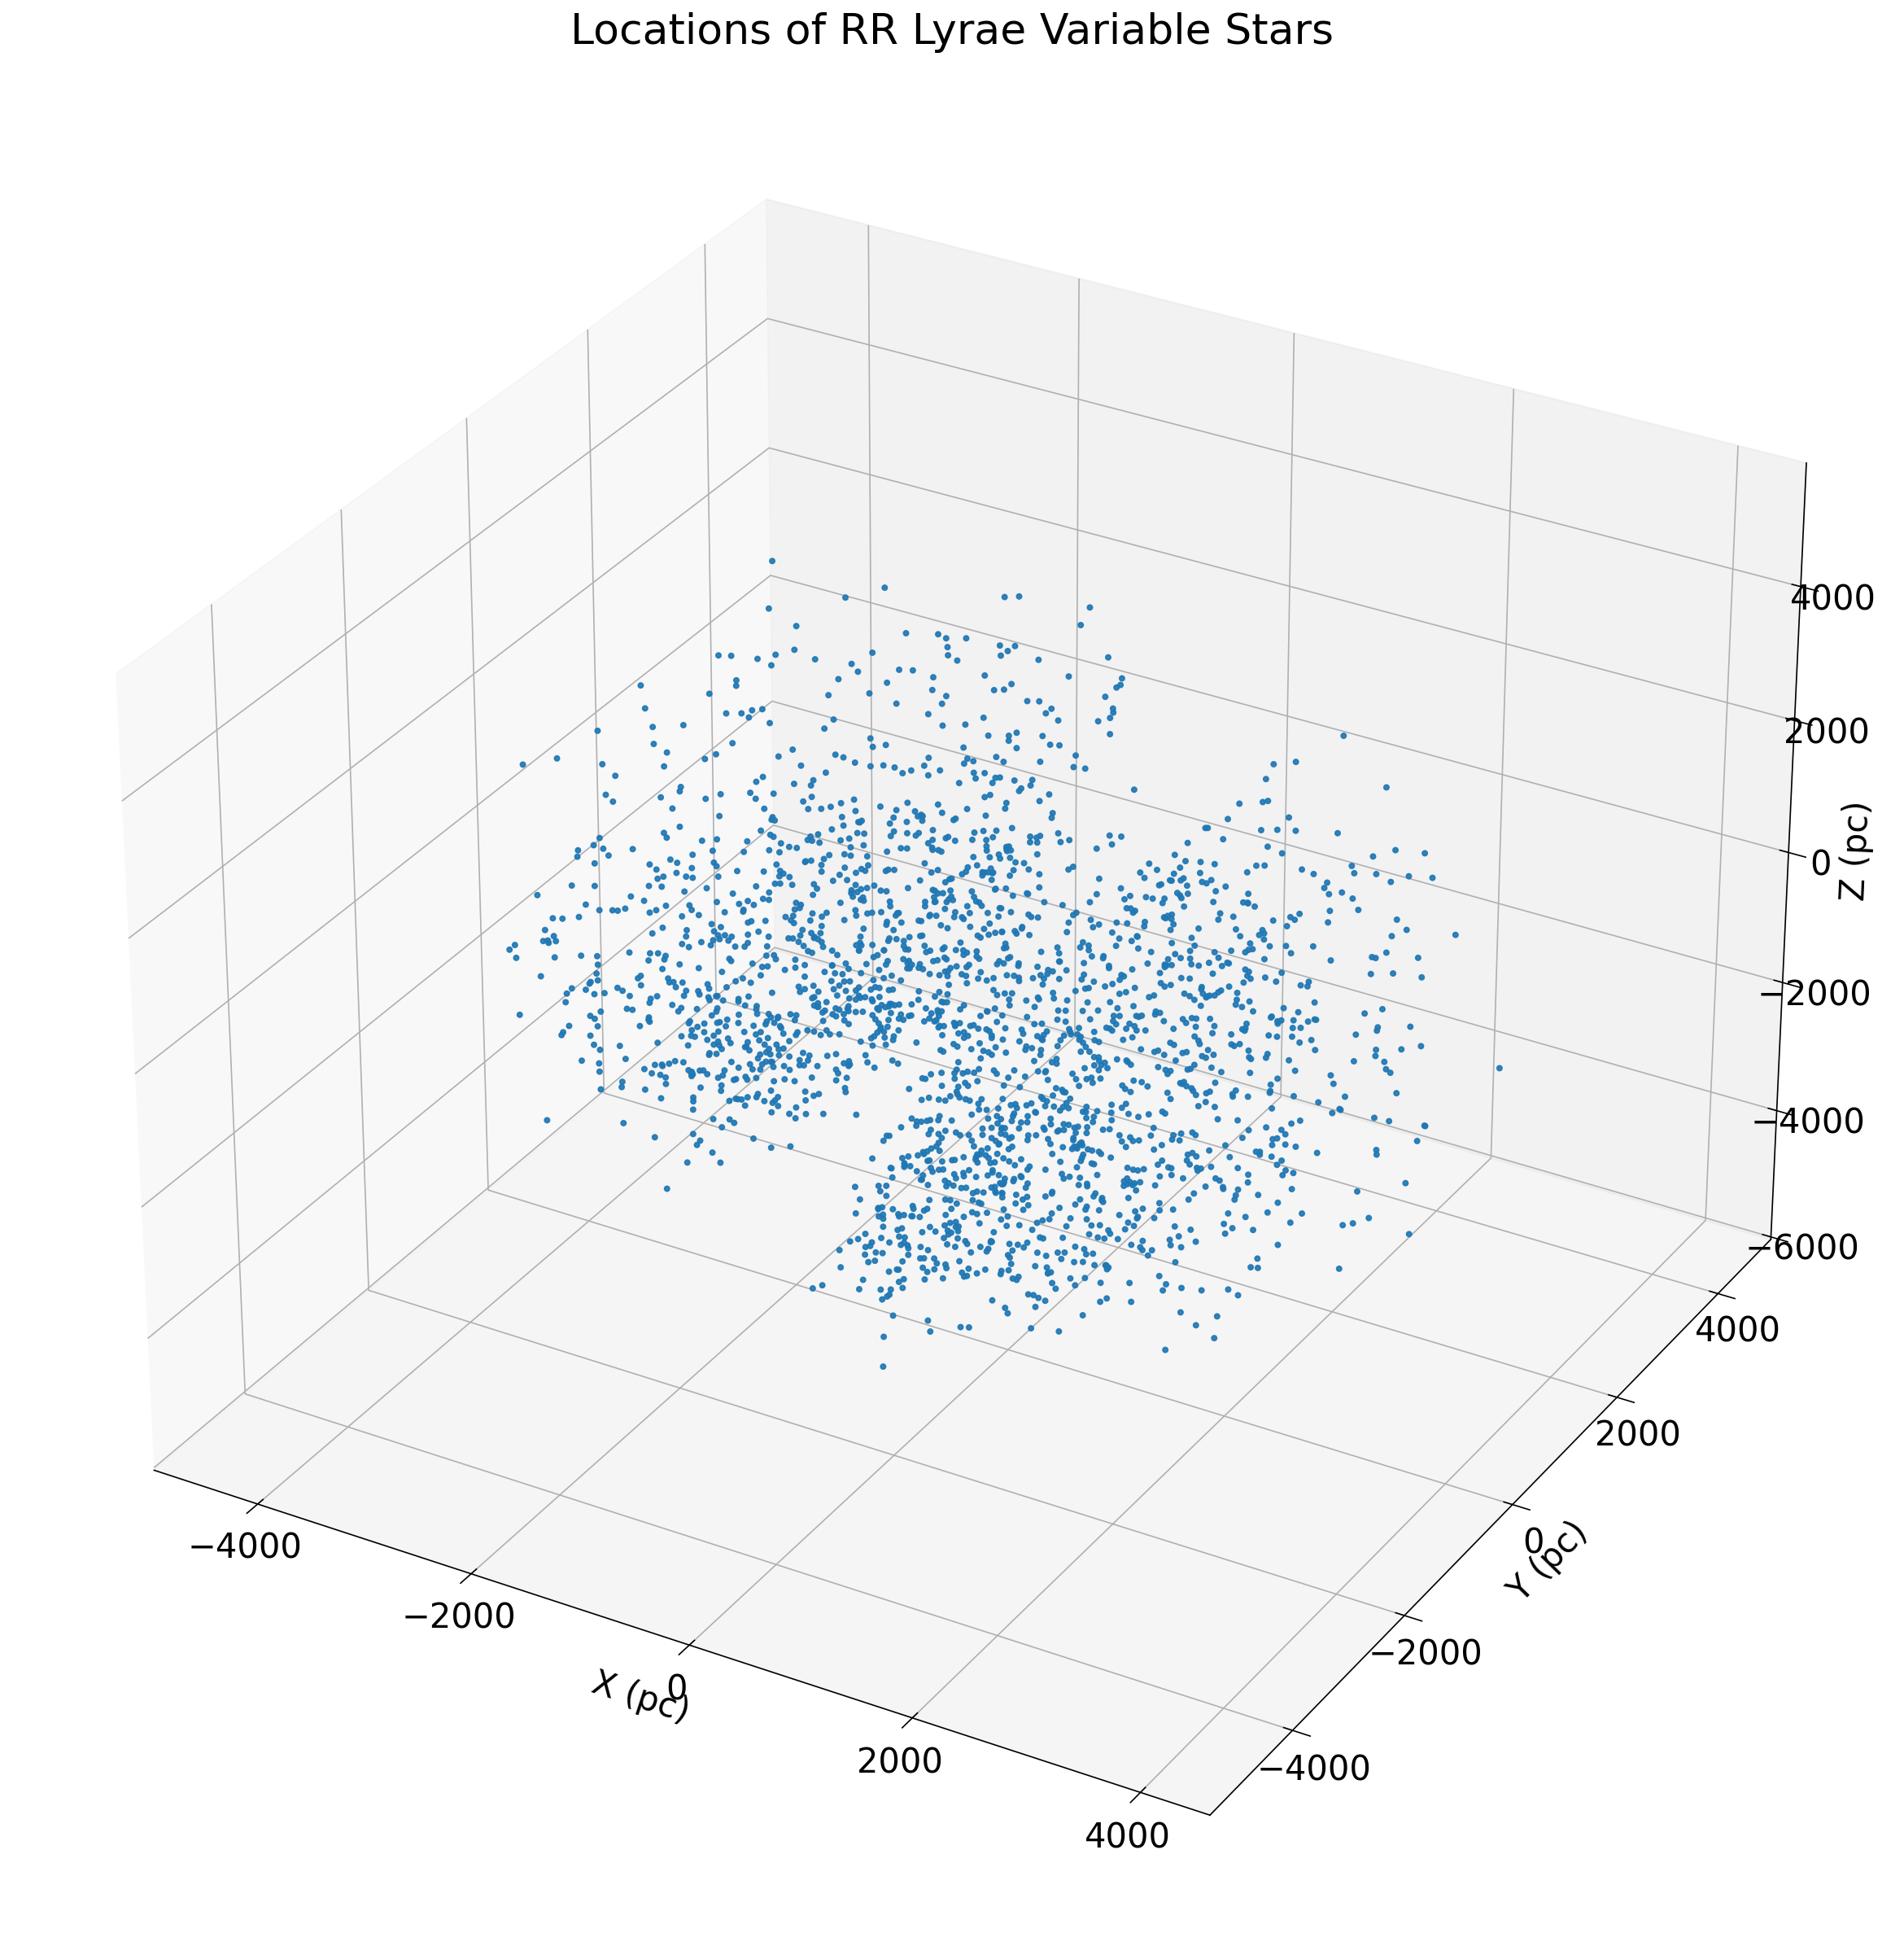

In [243]:
fig = plt.figure(figsize=(20, 20), dpi = 150)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, alpha = 0.9, s = 8)
ax.set_xlabel('X (pc)', size=20)
ax.set_ylabel('Y (pc)', size=20)
ax.set_zlabel('Z (pc)', size=20)
ax.set_title('Locations of RR Lyrae Variable Stars', size=25)
ax.tick_params(axis='both', which='major', labelsize=20)
#plt.tight_layout()
plt.show()

In [202]:
ra_rad = np.radians(filtered_rr['VSX_RA'])
dec_rad = np.radians(filtered_rr['VSX_Dec'])

x = filtered_rr['distance'] * np.cos(dec_rad) * np.cos(ra_rad)
y = filtered_rr['distance'] * np.cos(dec_rad) * np.sin(ra_rad)
z = filtered_rr['distance'] * np.sin(dec_rad)

fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=1.5,
        opacity=0.8
    )
)])

fig.update_layout(
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    ),
    margin=dict(l=0, r=0, b=0, t=0),
    width=800,
    height=800
)

fig.show()


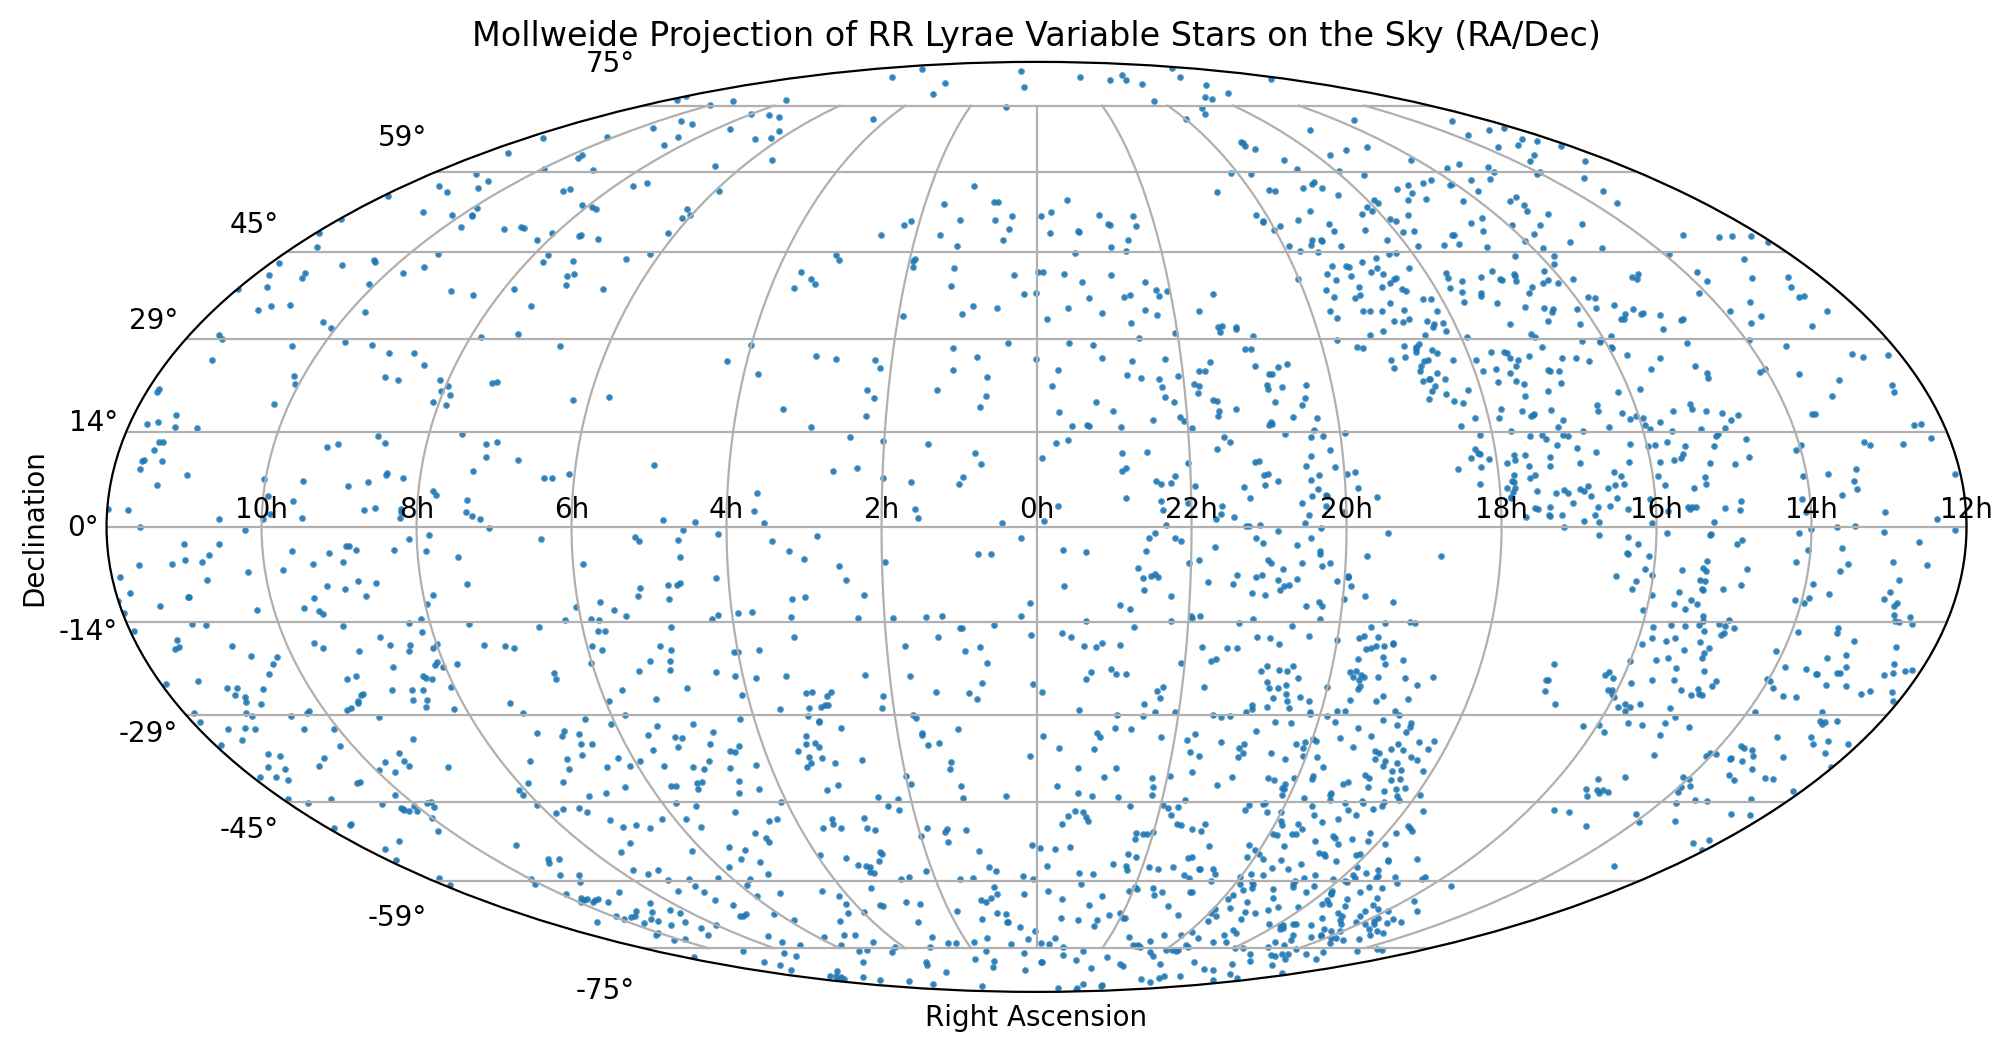

In [224]:
ra = np.radians(filtered_rr['VSX_RA'].values)
dec = np.radians(filtered_rr['VSX_Dec'].values)

# Shift RA to [-π, π] and flip for sky view
ra = np.remainder(ra + 2*np.pi, 2*np.pi)
ra[ra > np.pi] -= 2*np.pi
ra = -ra

# Create Mollweide plot
fig = plt.figure(figsize=(12, 8), dpi=200)
ax = fig.add_subplot(111, projection='mollweide')

# Scatter plot
ax.scatter(ra, dec, s=2, alpha=0.8)

# Grid
ax.grid(True)

# Set RA tick labels in hours
tick_labels = np.array([150, 120, 90, 60, 30, 0, -30, -60, -90, -120, -150, -180])  # Degrees
tick_locs = -np.radians(tick_labels)  # Flip for sky view
hour_labels = [(int(t/15)) % 24 for t in tick_labels]  # Convert deg to hour, mod 24

ax.set_xticks(tick_locs)
ax.set_xticklabels([f'{h}h' for h in hour_labels])

# Set Dec tick labels in degrees
ax.set_yticklabels([f'{int(np.degrees(d))}°' for d in ax.get_yticks()])

# Labels and title
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')
ax.set_title('Mollweide Projection of RR Lyrae Variable Stars on the Sky (RA/Dec)')

plt.show()